# Compare Data and Simulated spectra
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- creation date   : June 20th 2017
- re-written after new simulation SimulateSpectrum : 18th October 2017


In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
print theNotebook

AnaCompareDataSimSpec


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaCompareDataSimSpec
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_30may17/HD111980


In [5]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

In [7]:
import datetime
from datetime import timedelta
from dateutil import parser  # very usefull time format smart parser

In [8]:
import matplotlib as mpl
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [9]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [10]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days=mdates.DayLocator()  # every day
hour=mdates.HourLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

In [11]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Input

In [12]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=58
MAX_IMGNUMBER=190
date="20170530"
object_name='HD111980'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output Fits file

In [13]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

In [14]:
outputdir="./spectrum_compdatasim"

In [15]:
ensure_dir(outputdir)

# Open Input Files

In [16]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [17]:
all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

# Analysis

## Dispersers

In [18]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [19]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [  4   5  14  15  24  25  34  35  44  45  54  55  64  65  74  75  84  85
  94  95 104 105 114 115 124 125]
dia Thor300  	 : filt1_idx ::  [  0   1   2   3   6   7  16  17  26  27  36  37  46  47  56  57  66  67
  76  77  86  87  96  97 106 107 116 117 126 127]
dia HoloPhP  	 : filt2_idx ::  [  8   9  18  19  28  29  38  39  48  49  58  59  68  69  78  79  88  89
  98  99 108 109 118 119 128 129]
dia HoloPhAg  	 : filt3_idx ::  [ 10  11  20  21  30  31  40  41  50  51  60  61  70  71  80  81  90  91
 100 101 110 111 120 121 130 131]
dia HoloAmAg  	 : filt4_idx ::  [ 12  13  22  23  32  33  42  43  52  53  62  63  72  73  82  83  92  93
 102 103 112 113 122 123 132]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [20]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

## Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


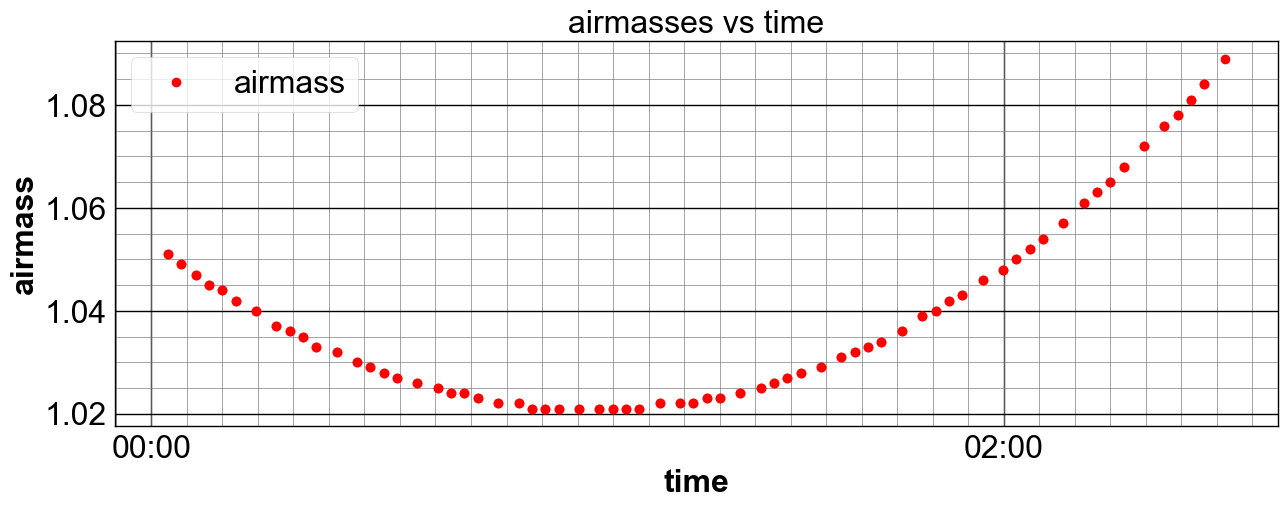

In [21]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

## Show Spectra
==========================

In [22]:
NDATA=len(all_rightspectra_data)

In [23]:
def ShowCalibAndSimSpectrainPDF(all_spectra,all_wl,all_titles,object_name,all_filt,dir_top_img,sim_spec_data,sim_spec_wl,NBIMGPERROW=2):
    """
    ShowCalibAndSimSpectra: Compare spectra in data and sim in AnaCompareDataSimSpec.ipynb
    ==============
    """
    
    NormSpecRange= [790,810] # range where to normalize the spectra
    
    
    # number of spectra
    NBSPEC=len(all_spectra)
   
    MAXIMGROW=max(2,m.ceil(NBSPEC/NBIMGPERROW))
    #MAXIMGROW=int(MAXIMGROW)
        
    # calibration factor required
    calibdatasimfactor = []    
        
        
     # fig file specif
    NBIMGROWPERPAGE=5  # number of rows per pages
    PageNum=0          # page counter
    
    figfilename=os.path.join(dir_top_img,'input_calibratedandsim_spectra.pdf')
    pp = PdfPages(figfilename) # create a pdf file
    
    title='Calibrated spectra for {}'.format(object_name)
         
   
  
    
    for index in np.arange(0,NBSPEC):
        if index%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
            f, axarr = plt.subplots(NBIMGROWPERPAGE,NBIMGPERROW,figsize=(25,30))
            f.suptitle(title,size=20,fontweight='bold')
 

        indexcut=index-PageNum*(NBIMGROWPERPAGE*NBIMGPERROW)    
        ix=indexcut%NBIMGPERROW
        iy=indexcut/NBIMGPERROW
        
        # extraction for data
        wl=all_wl[index]  # wavelength in data        
        spectrum=all_spectra[index]   # data
        maxdata_in_range=np.max(spectrum[np.where(np.logical_and(wl>NormSpecRange[0],wl<NormSpecRange[1]))]) # max in data in selected wl range
        
        # extraction for sim
        wl_sim= sim_spec_wl[index]       # wl
        spectrum_sim=sim_spec_data[index] # spec
        
        maxsim_in_range=np.max(spectrum_sim[np.where(np.logical_and(wl_sim>NormSpecRange[0],wl_sim<NormSpecRange[1]))]) # max in sim in selected wl range
        
        # calib factor per image
        calibfactor=maxdata_in_range/maxsim_in_range   # calib factor data/sim in wl range
        calibdatasimfactor.append(calibfactor) # for later analysis
        
        # plot spec data
        axarr[iy,ix].plot(wl,spectrum,'r-',lw=2,label='data') # plot data
        
        # renormalize sim
        spectrum_sim=spectrum_sim*calibfactor  # renormalize the sim to data units
        
        # plot sim
        axarr[iy,ix].plot(wl_sim,spectrum_sim,'b-',lw=1,label='sim')
        
        
        max_y_to_plot=spectrum[:].max()*1.4
        axarr[iy,ix].set_ylim(0.,max_y_to_plot)
        axarr[iy,ix].set_xlim(0.,1200.)
        axarr[iy,ix].text(0.,max_y_to_plot*1.1/1.4, all_filt[index],verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)
       
        axarr[iy,ix].set_title(all_titles[index])
        #axarr[iy,ix].set_title(all_filt[index])
        axarr[iy,ix].set_xlabel("wavelength (nm)")
        
        axarr[iy,ix].get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        axarr[iy,ix].get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        axarr[iy,ix].grid(b=True, which='major' ,color='grey', linewidth=0.5)
        #axarr[iy,ix].grid(b=True, which='minor', color='grey', linewidth=0.5)
      
        axarr[iy,ix].legend()
        
        # save a new page
        if (index+1)%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
            PageNum+=1  # increase page Number
            f.savefig(pp, format='pdf')
            f.show()
            
                
          
    
    f.savefig(pp, format='pdf') 
    f.show()
    pp.close()
    return np.array(calibdatasimfactor)
    

### Work only on right spectra

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


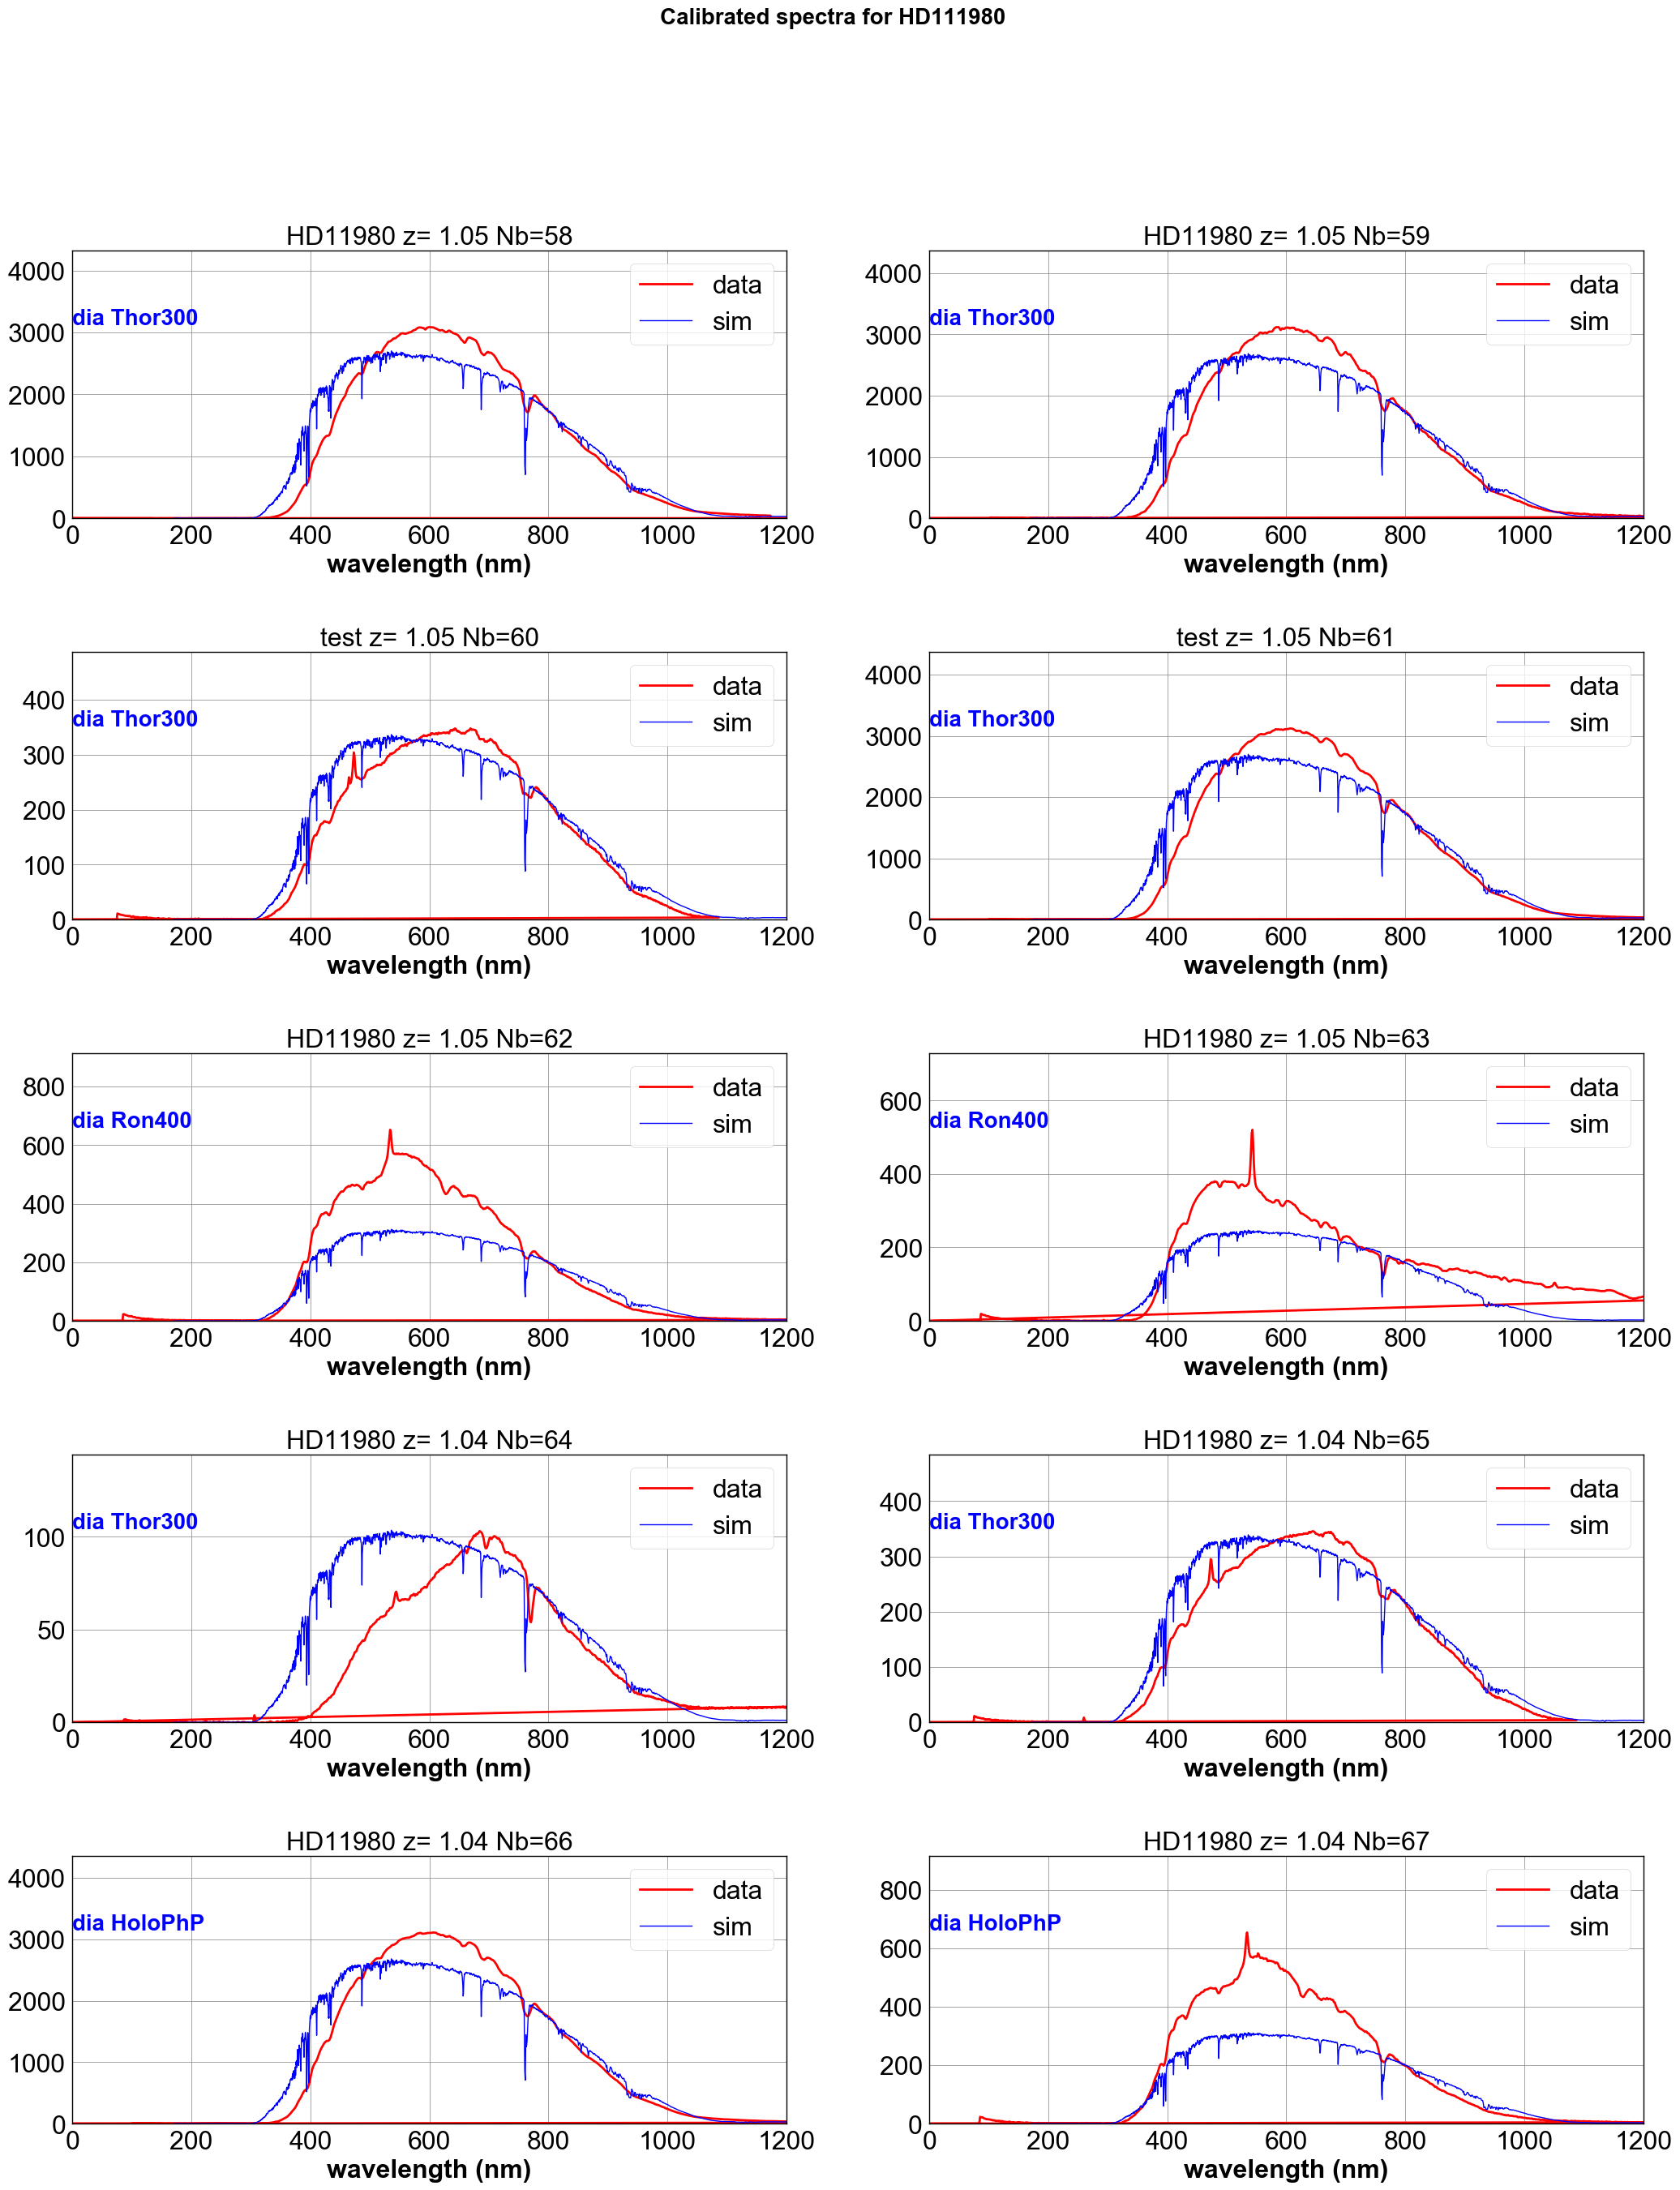

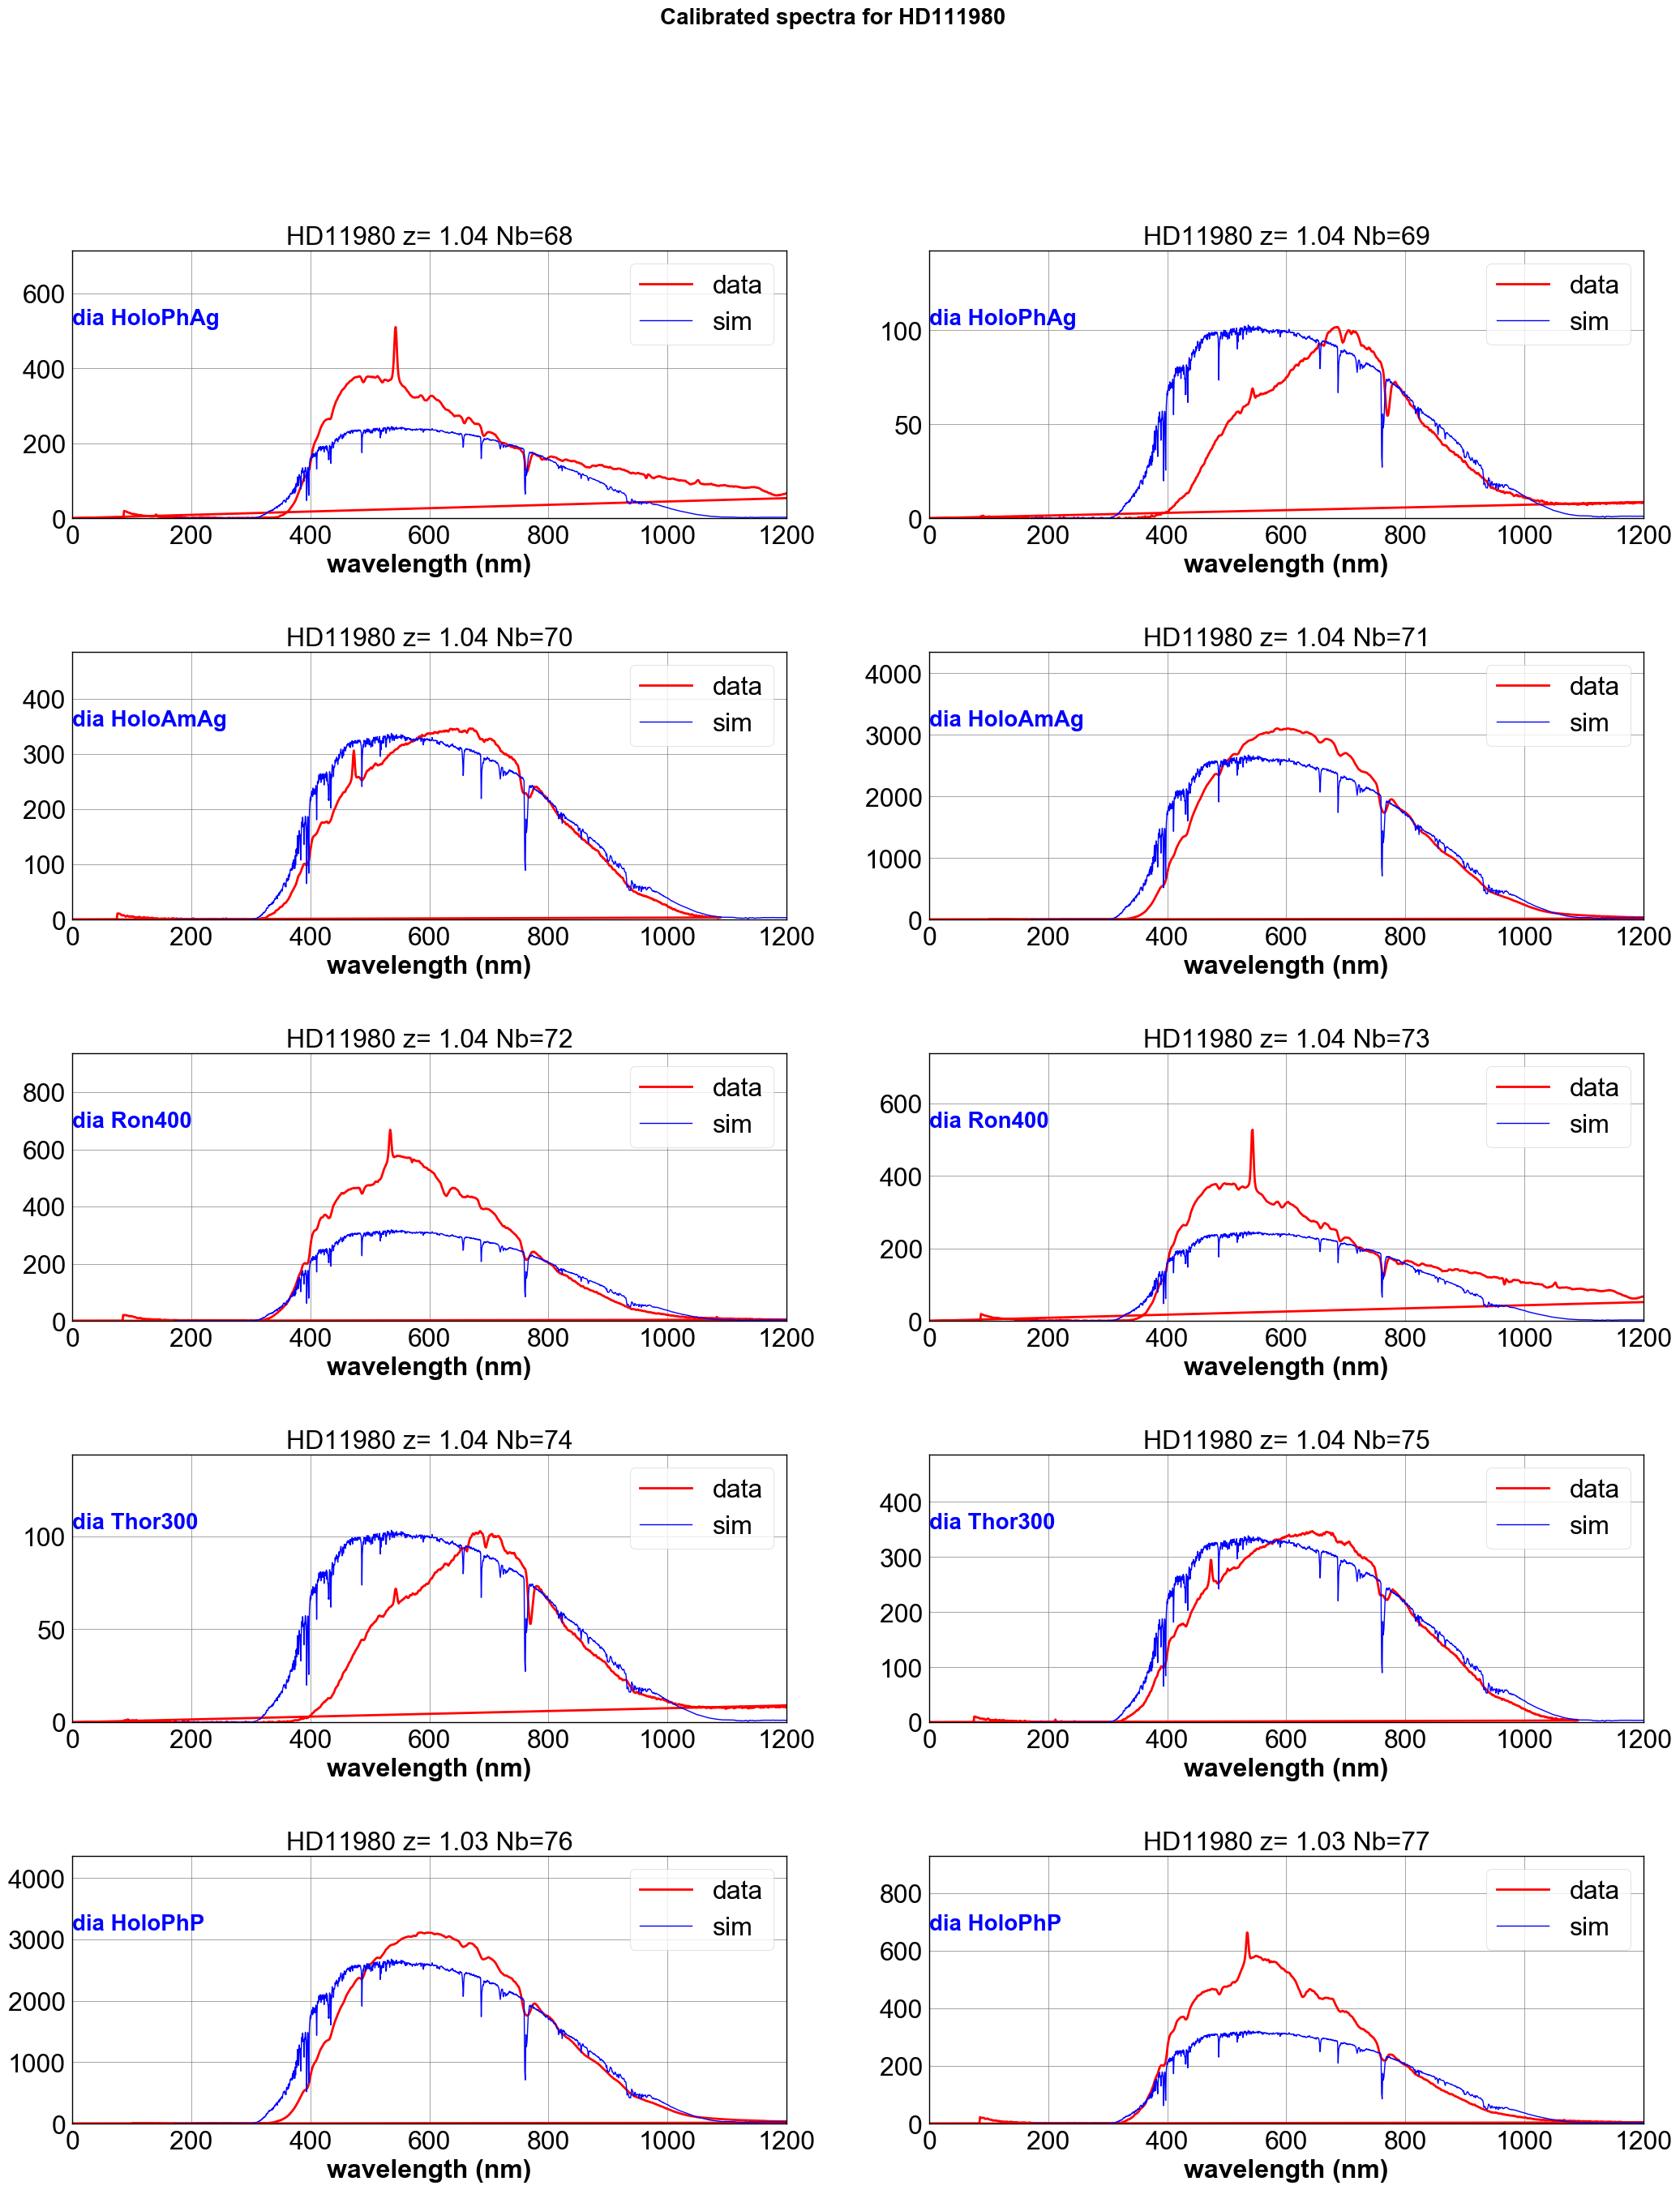

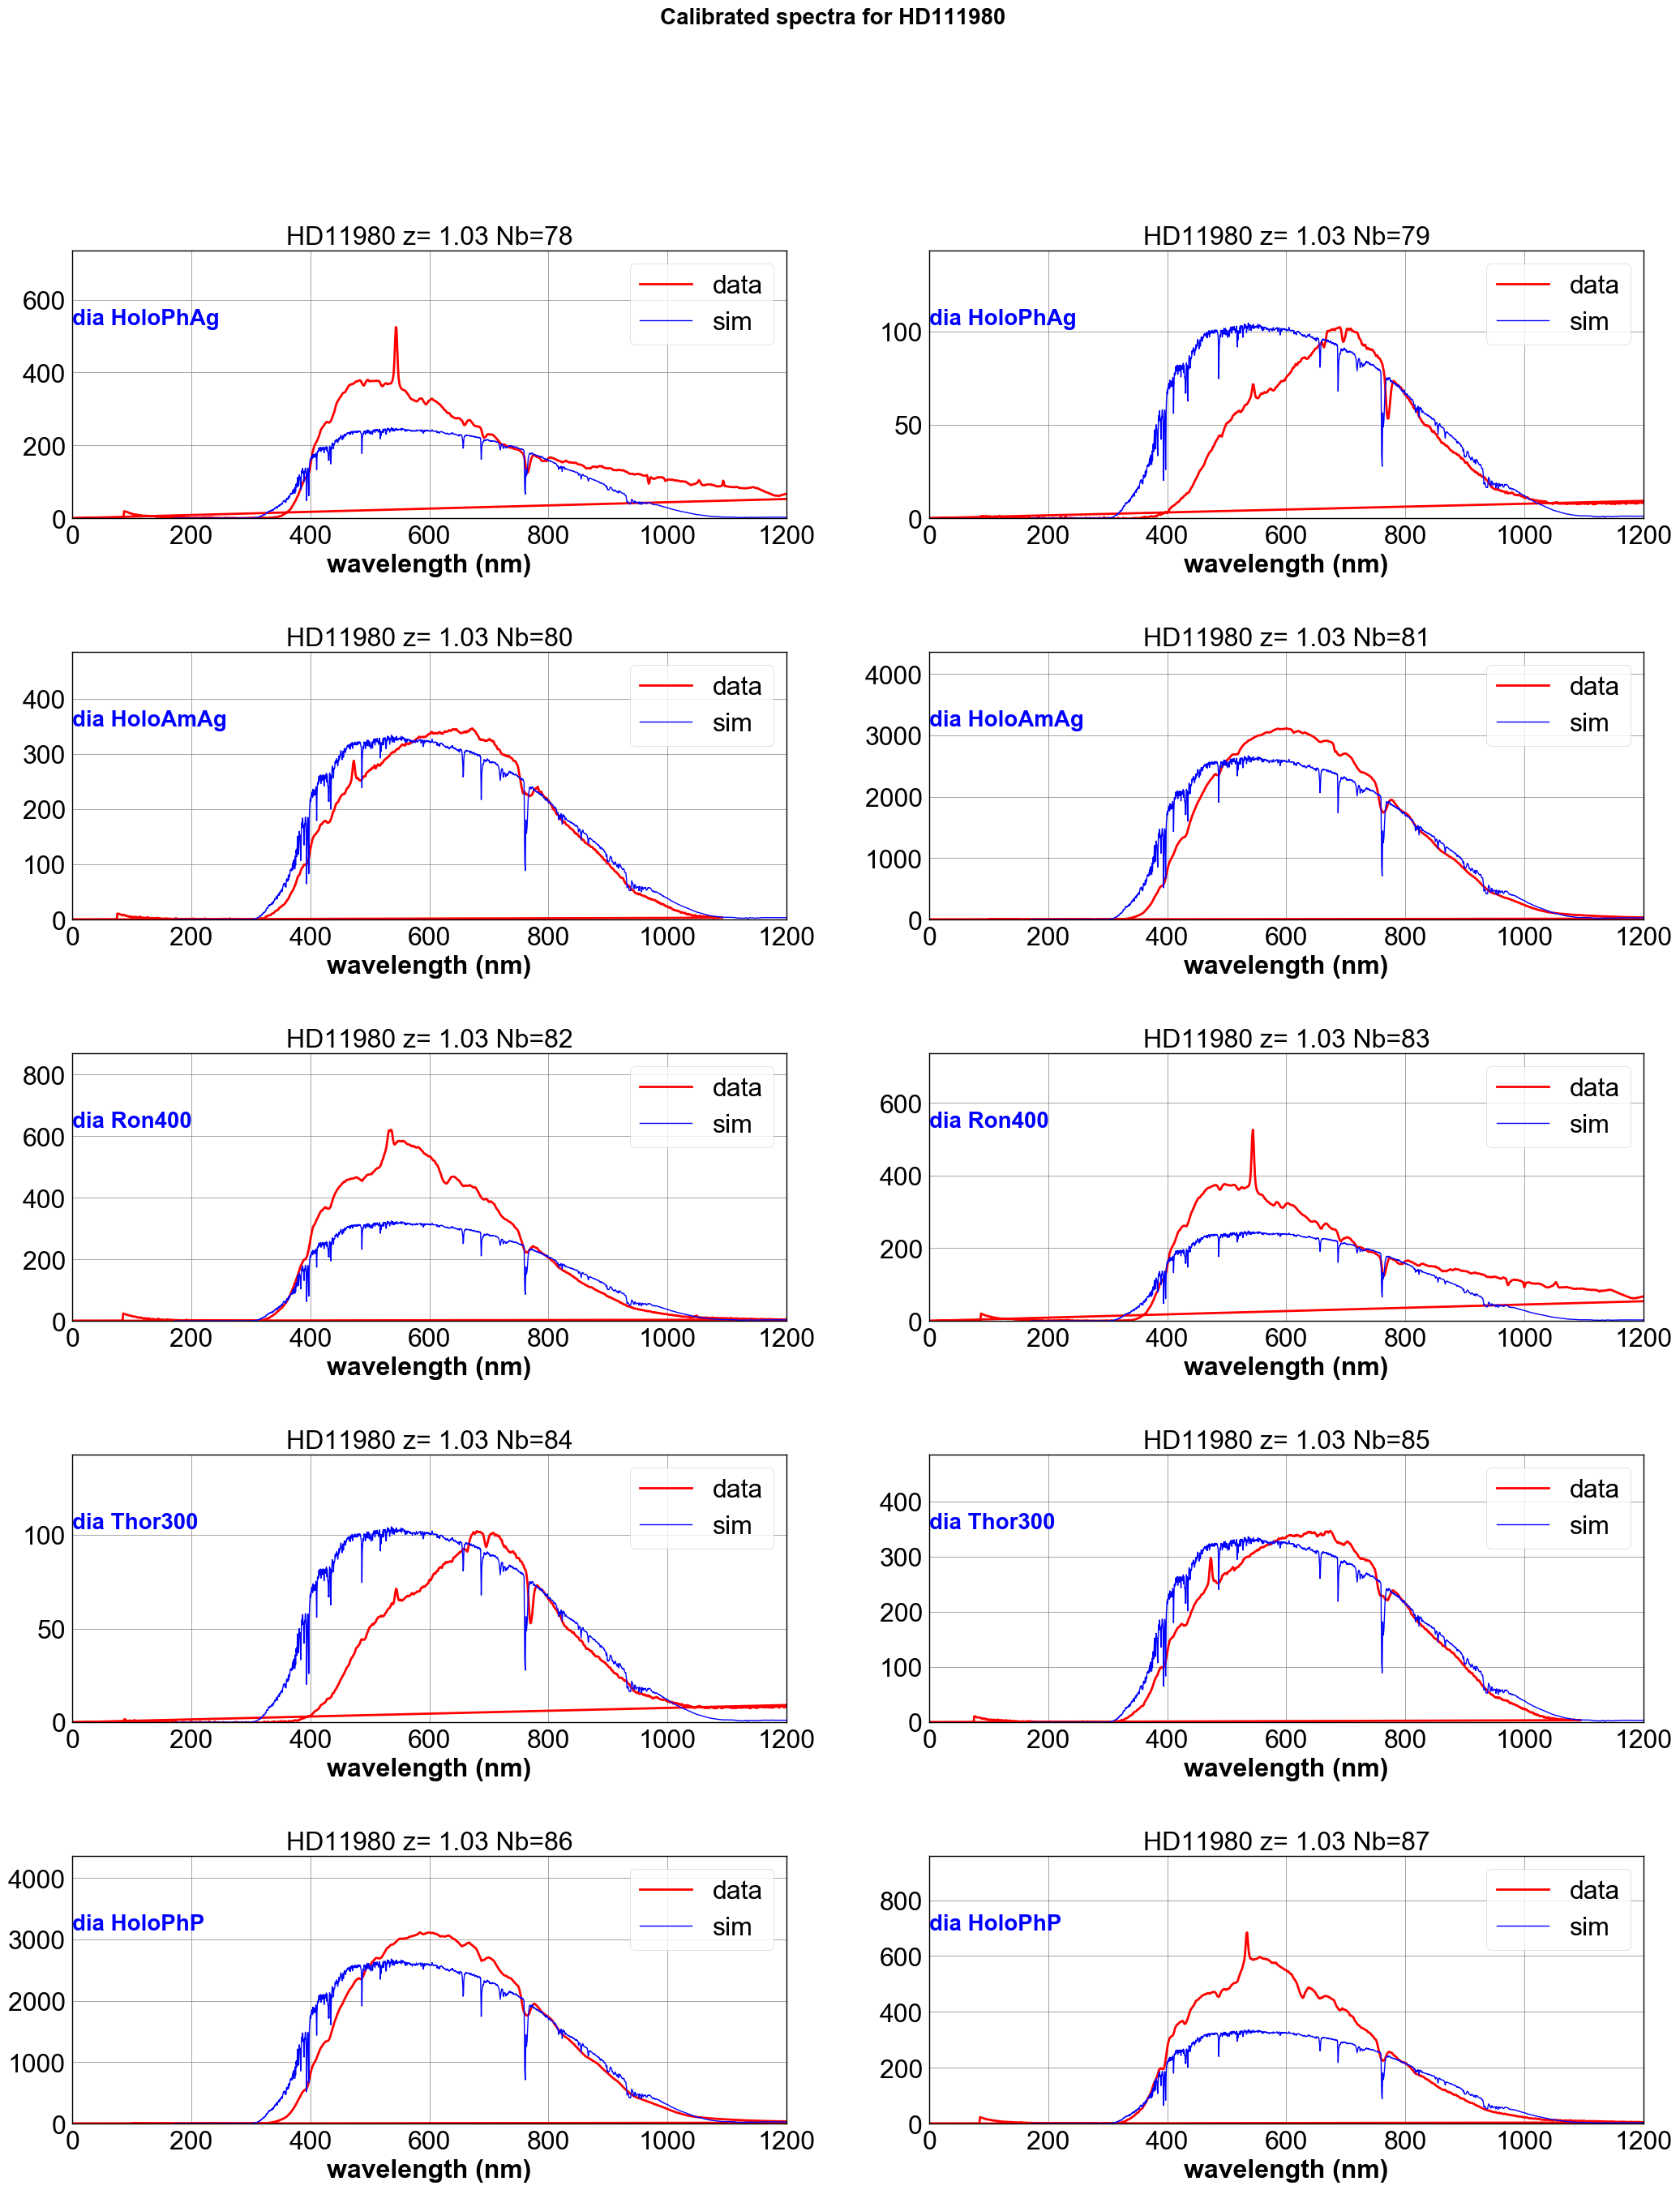

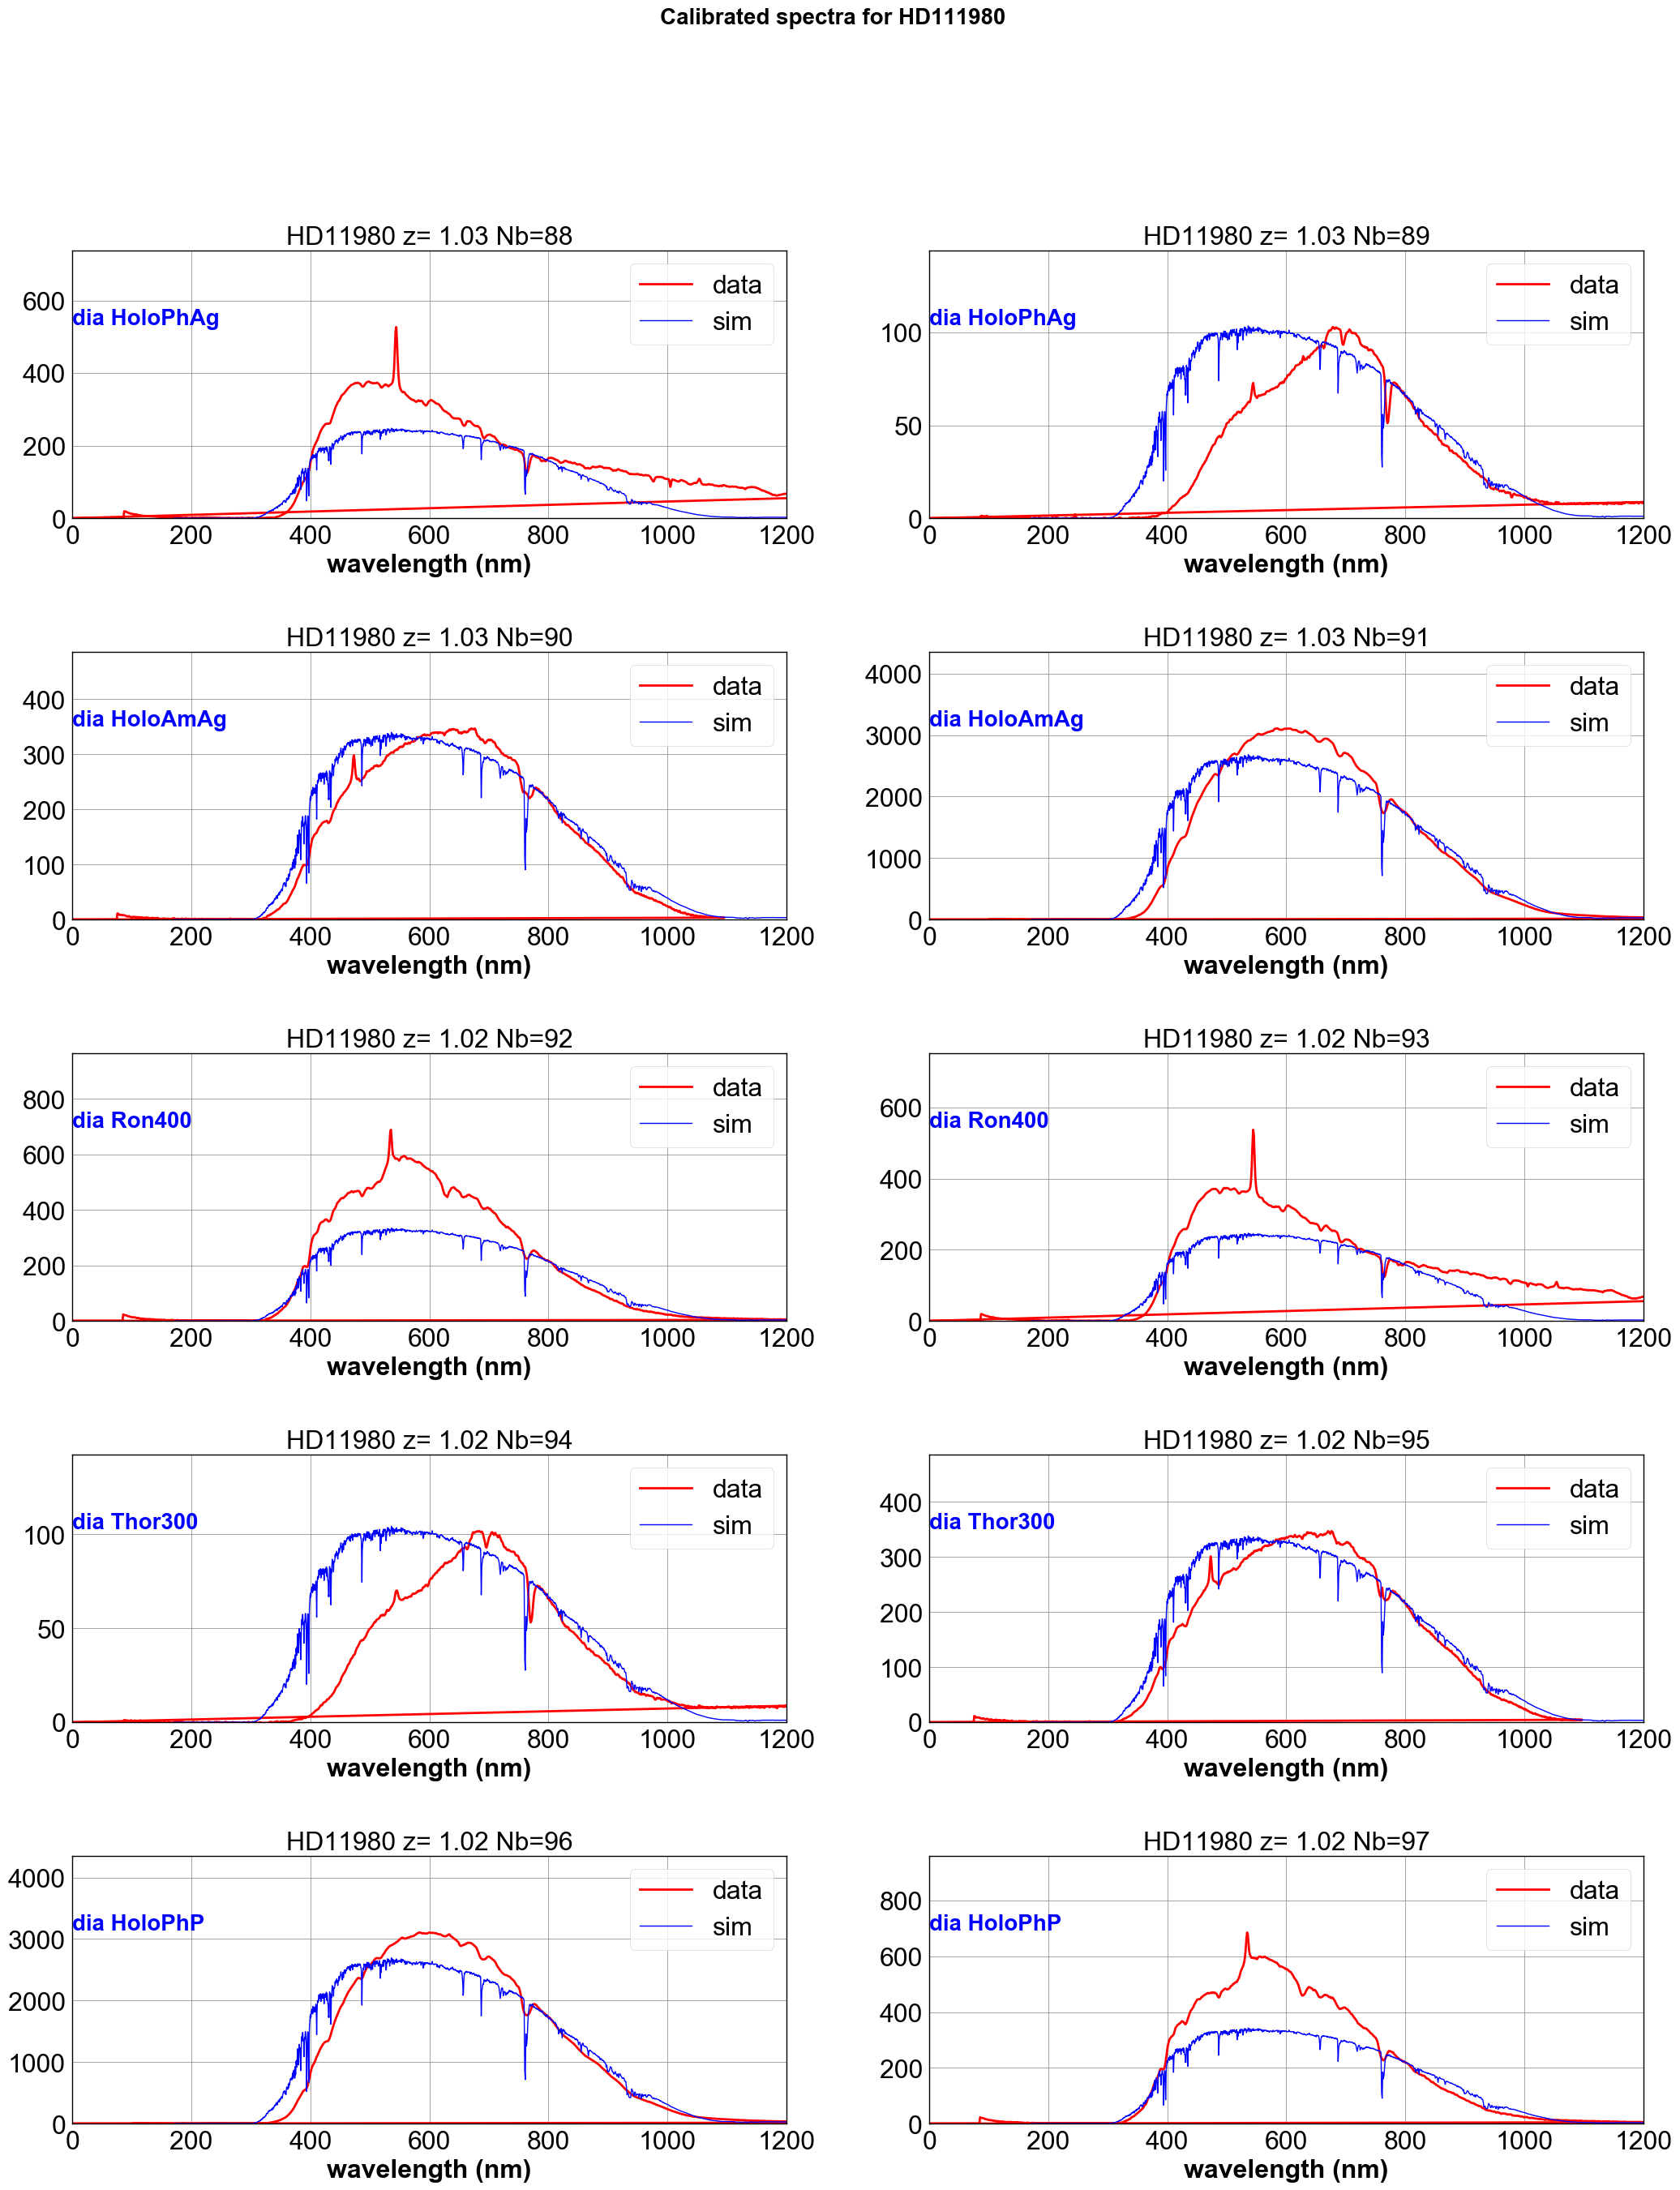

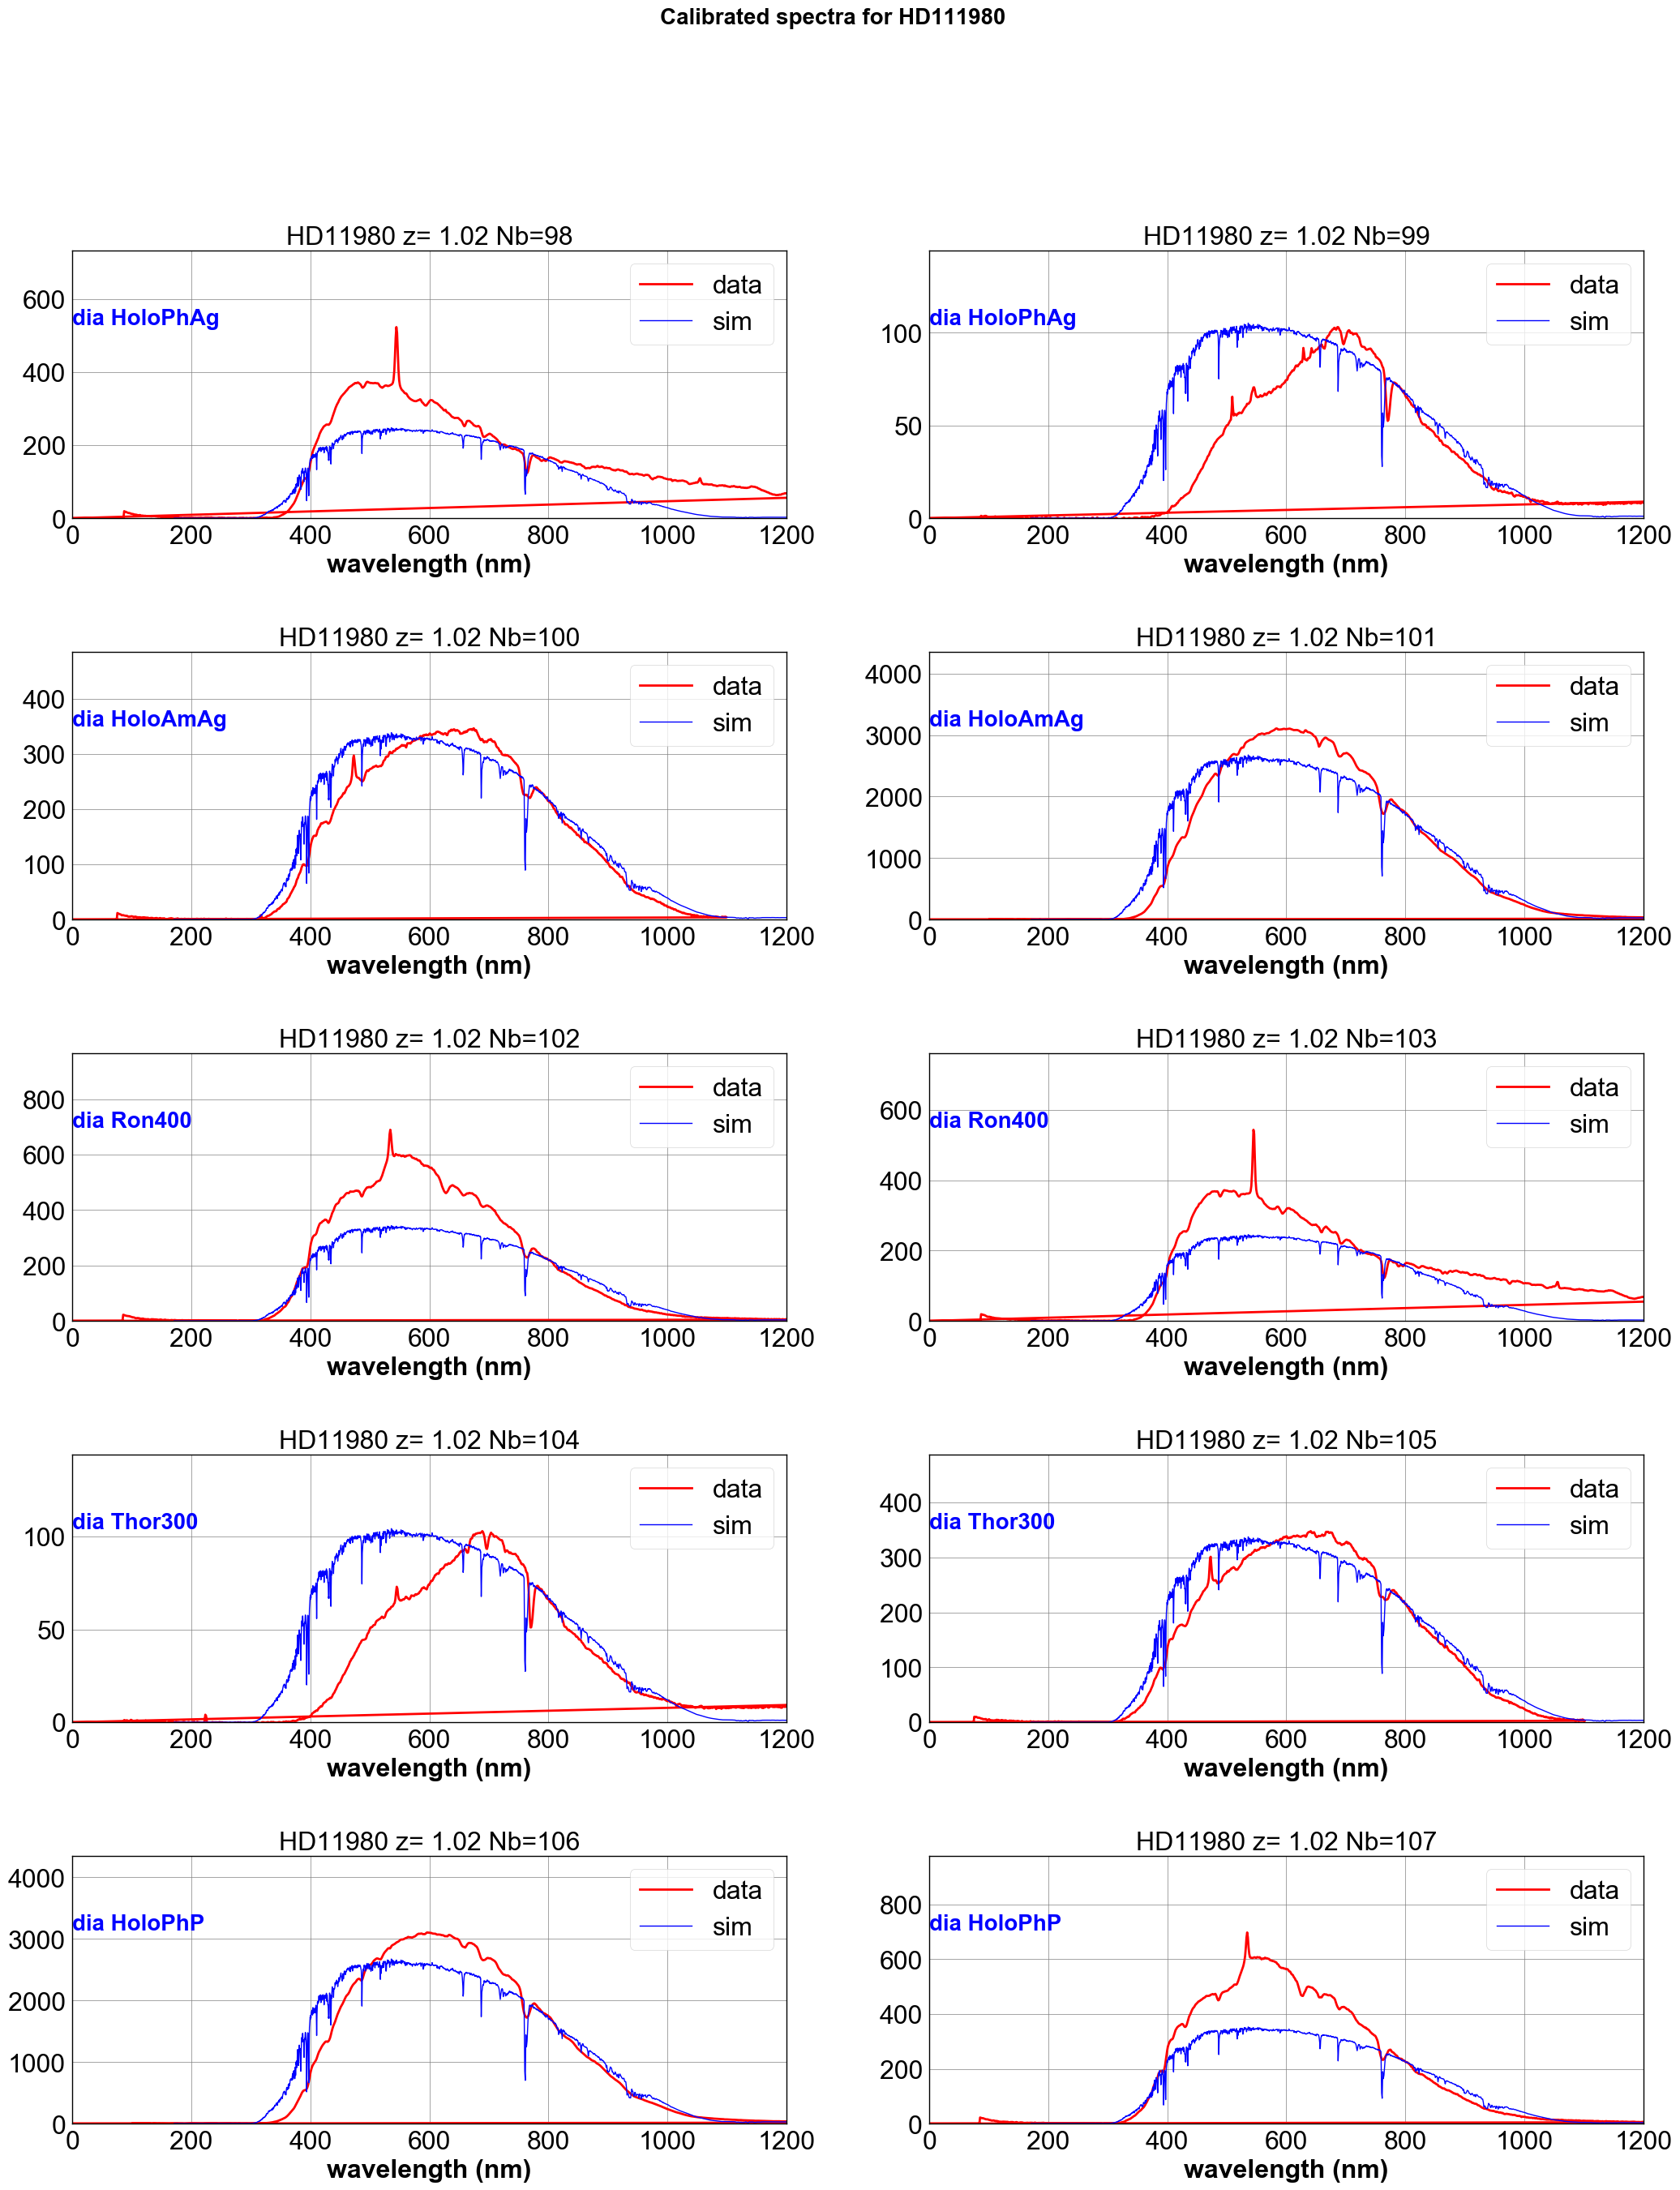

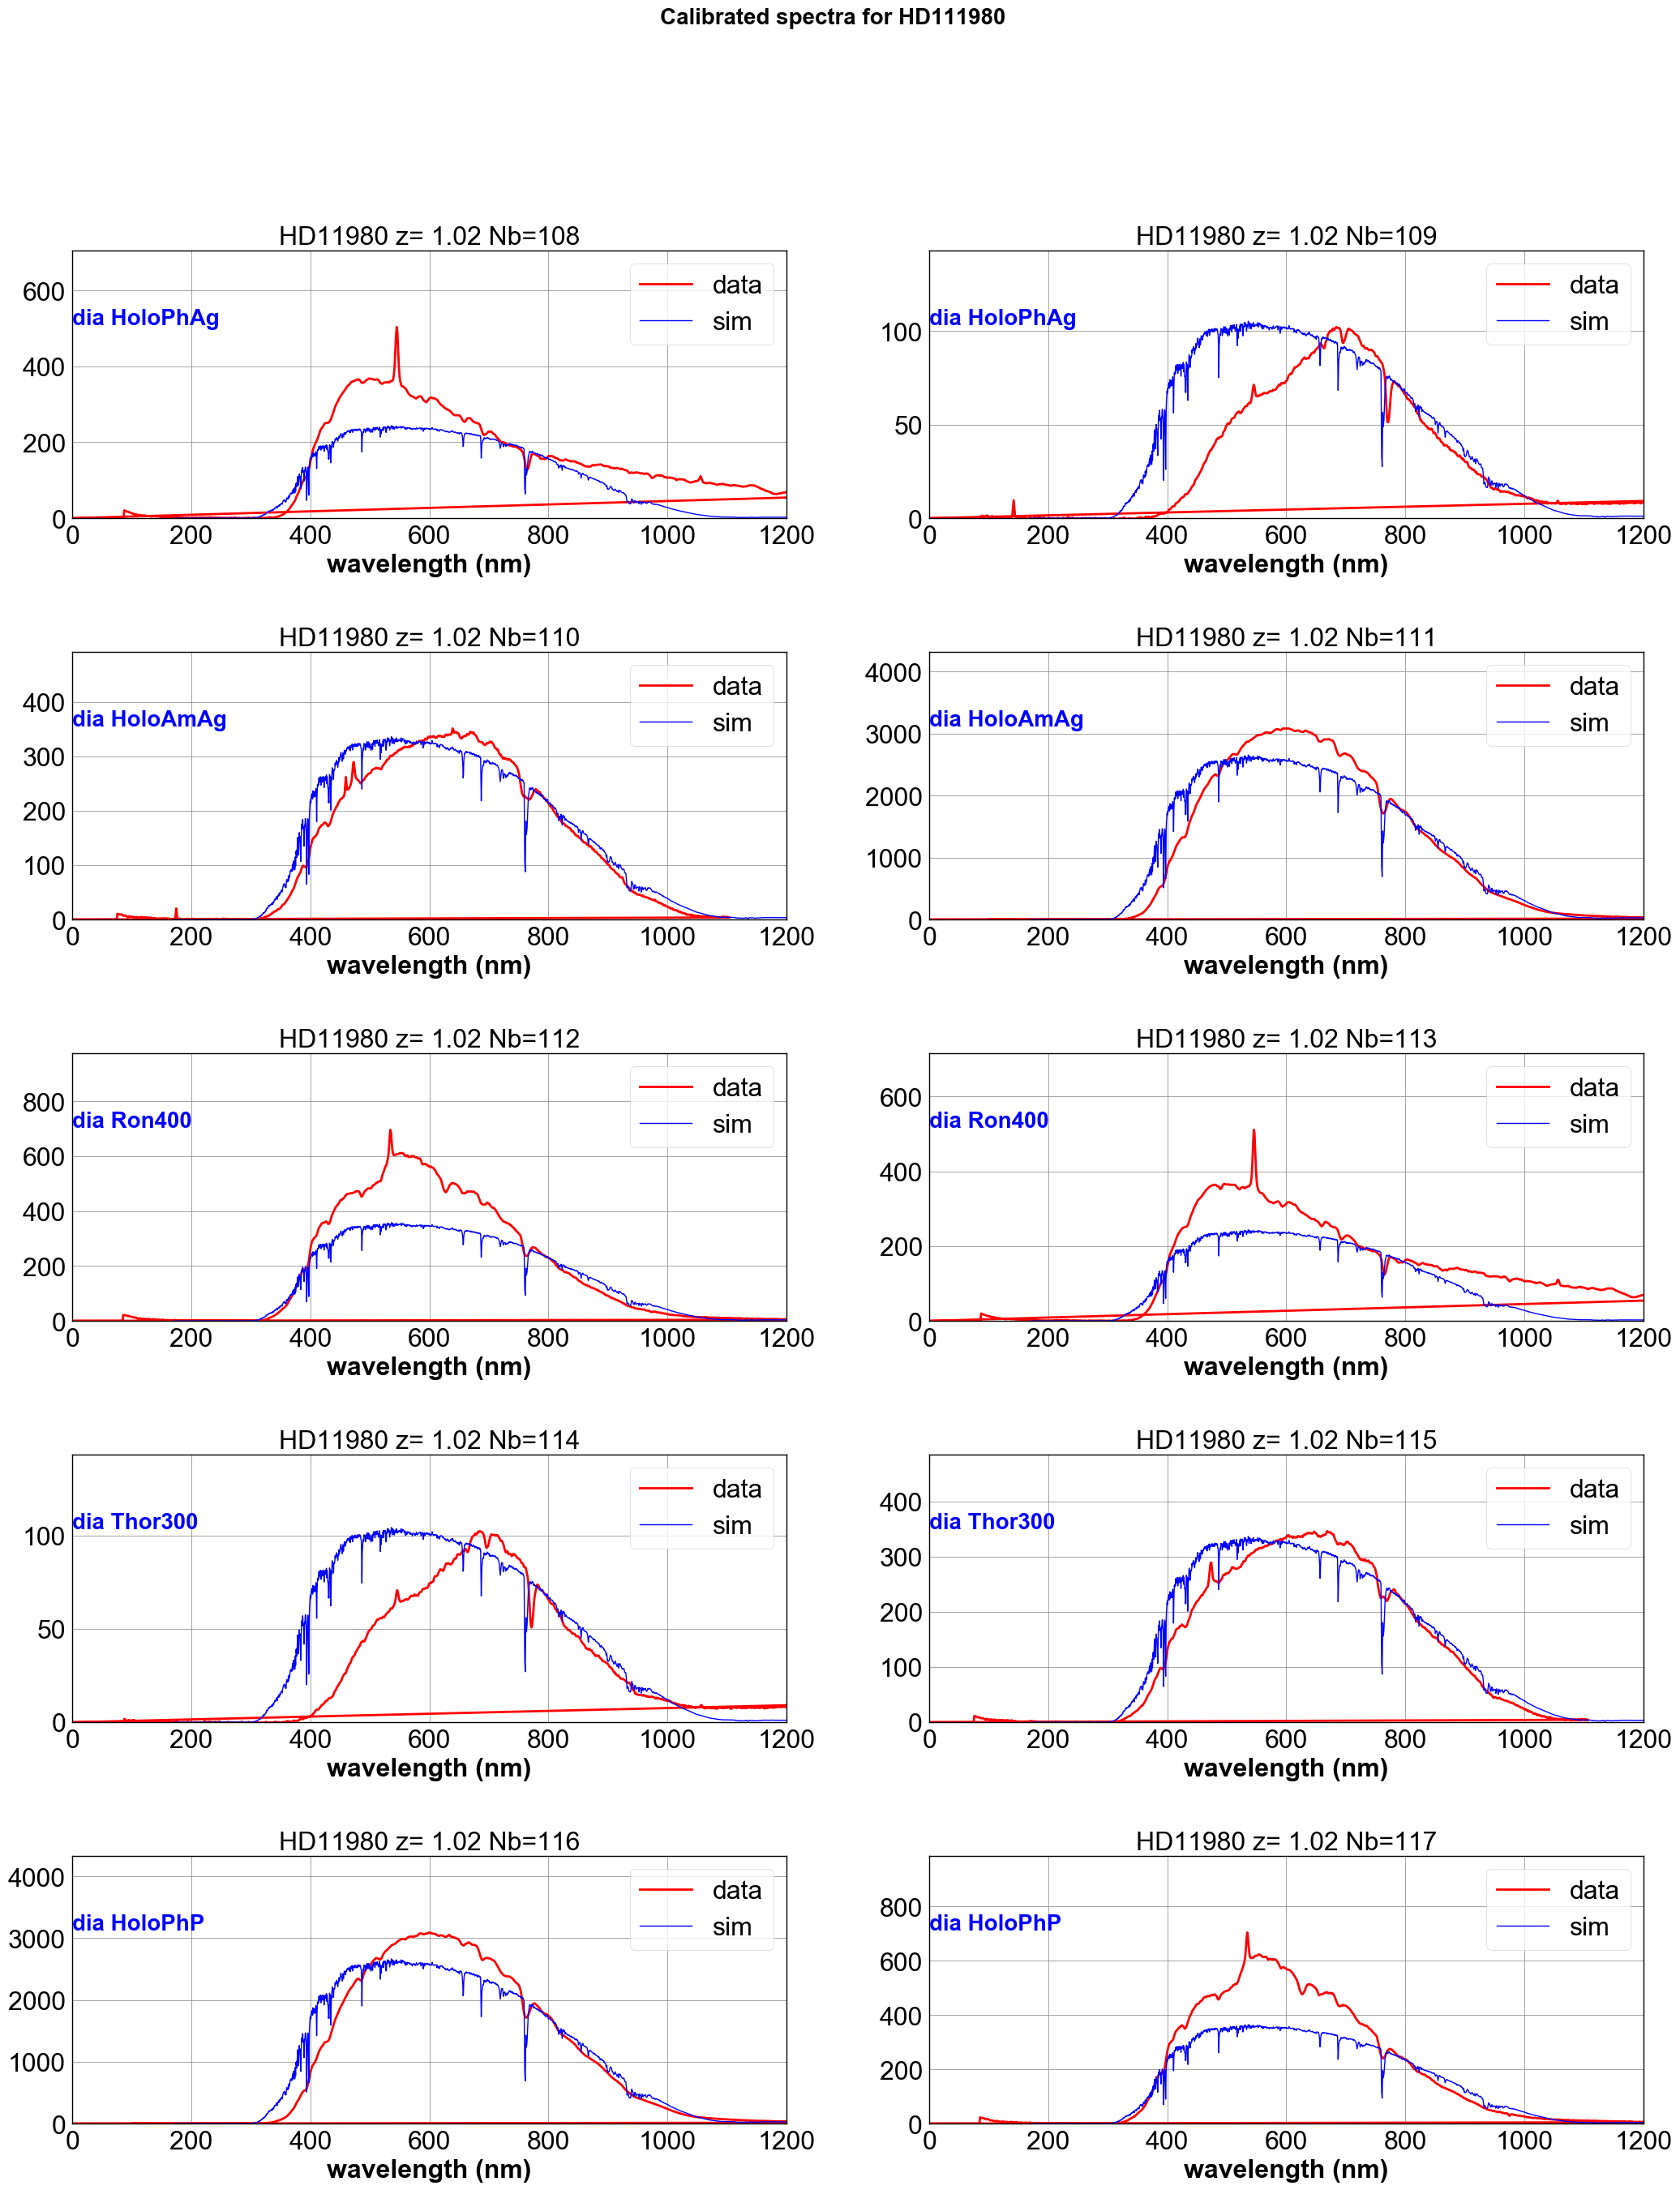

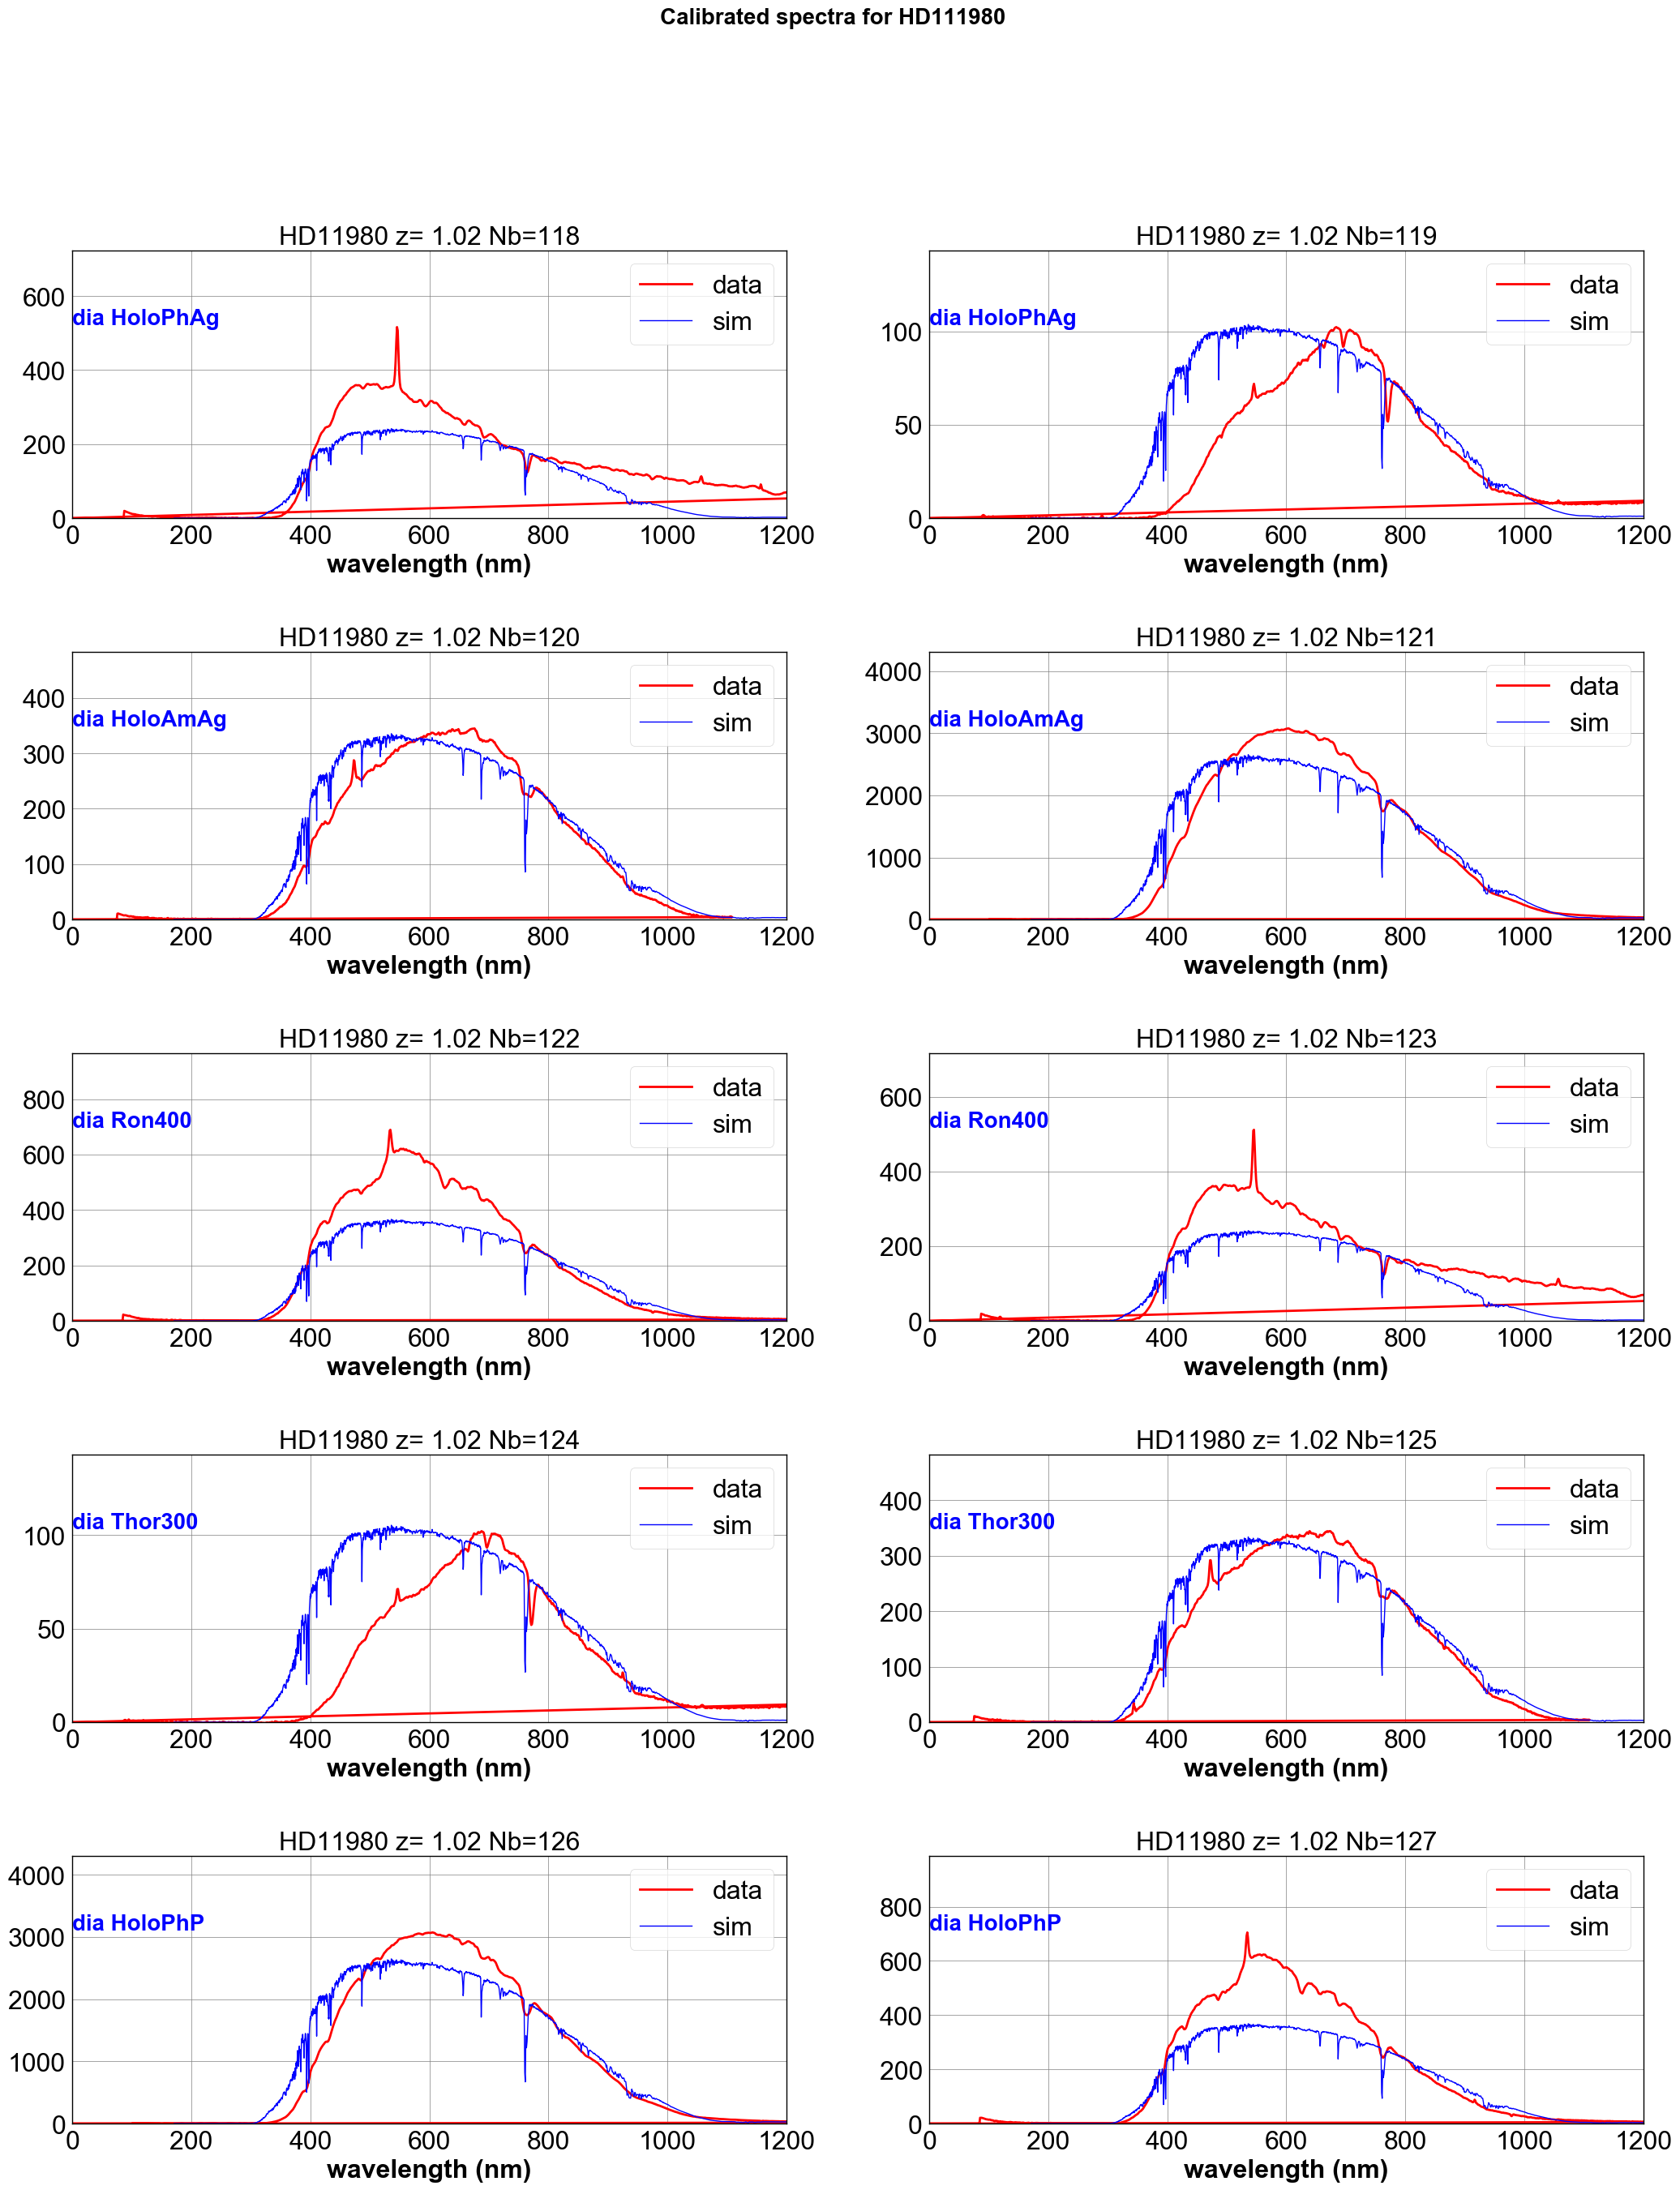

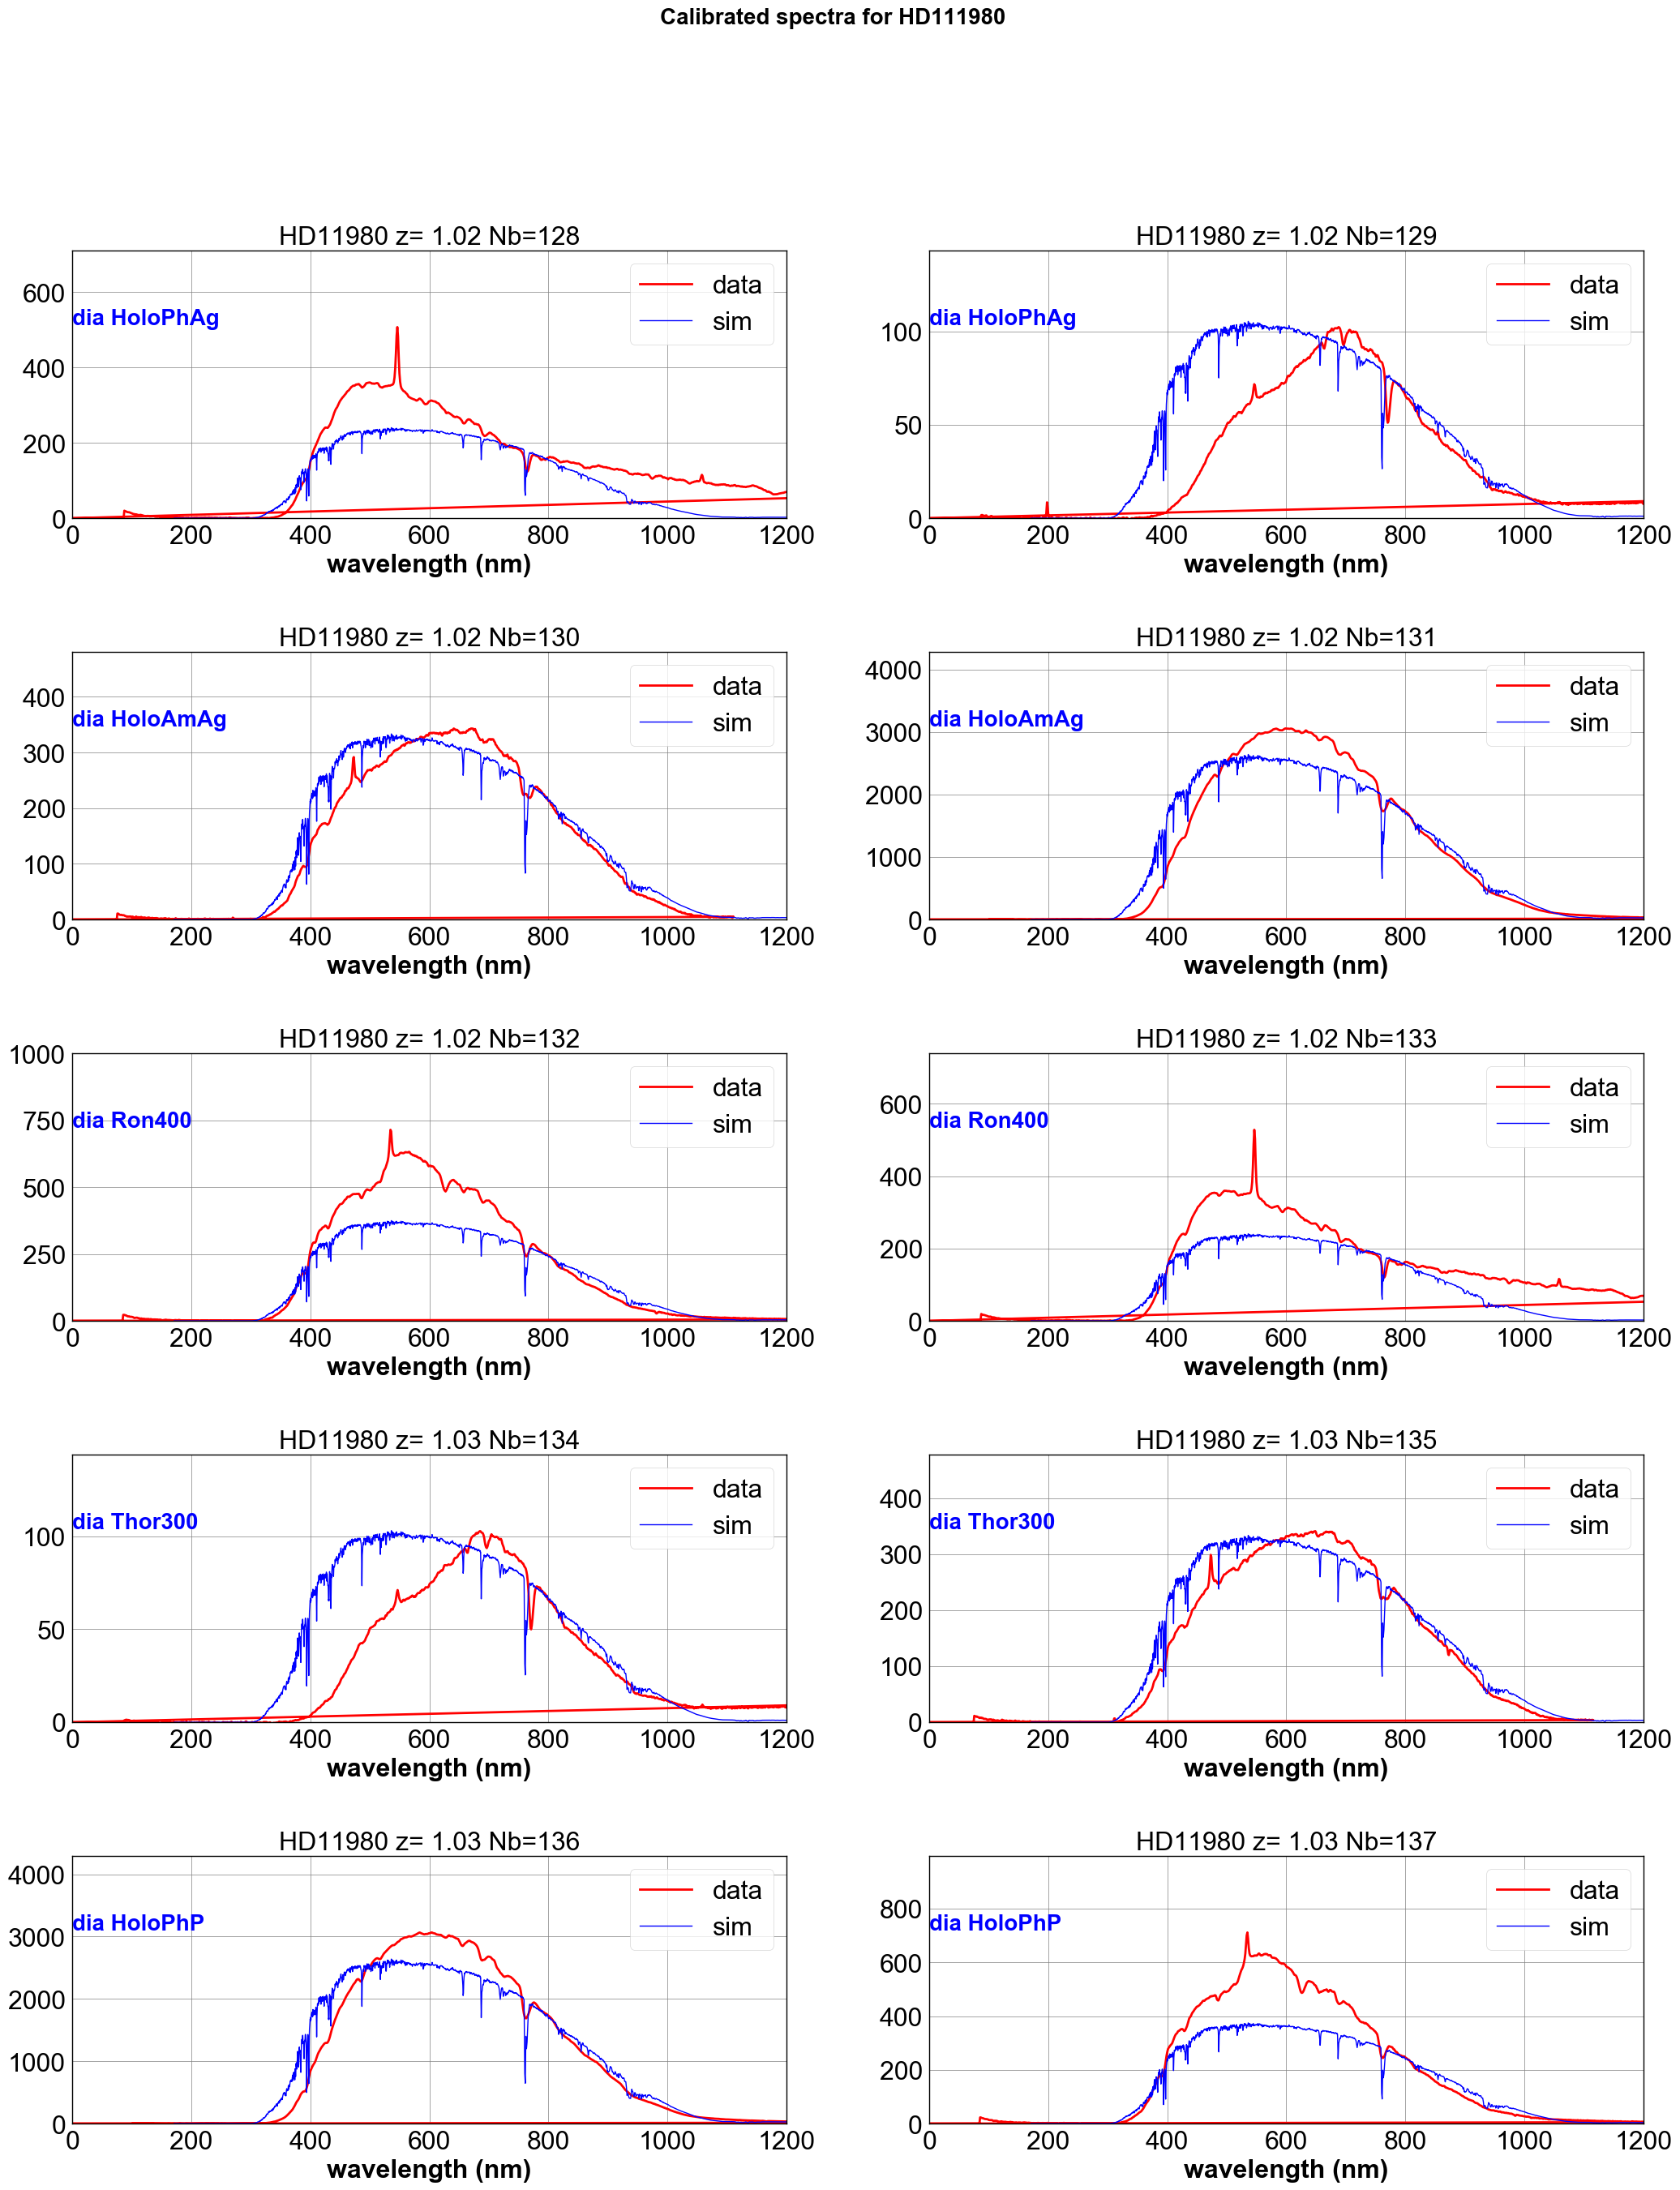

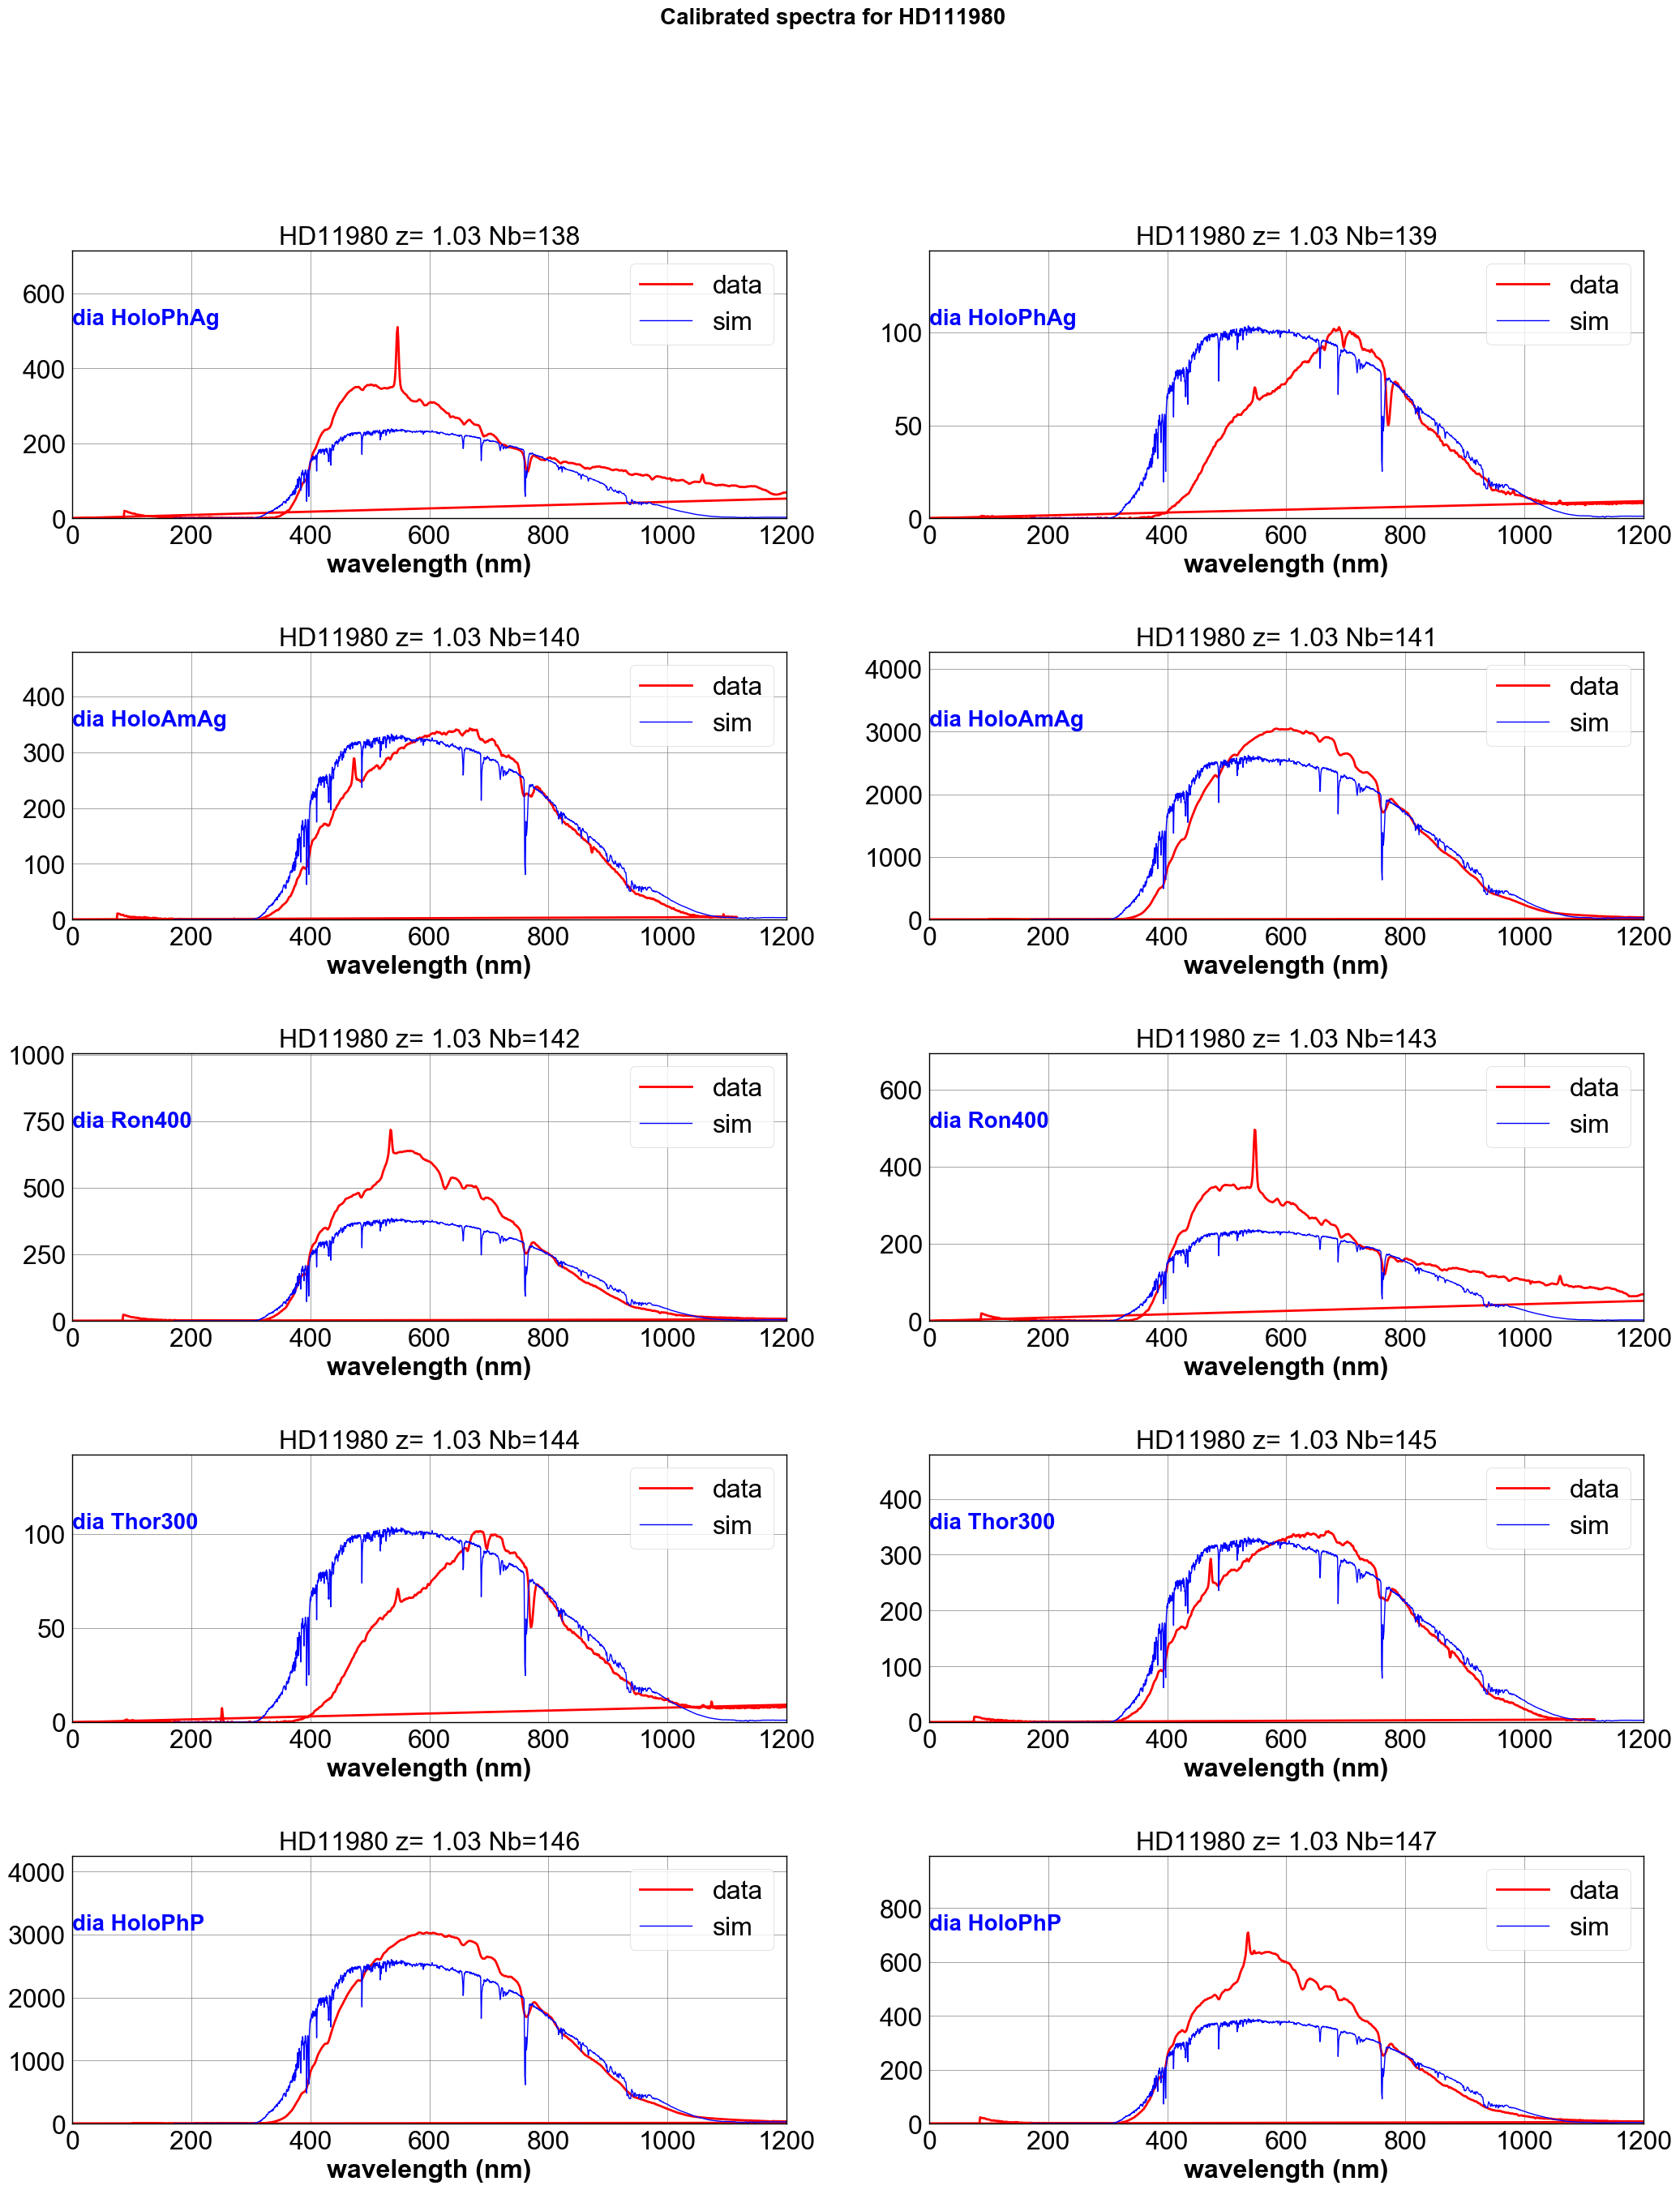

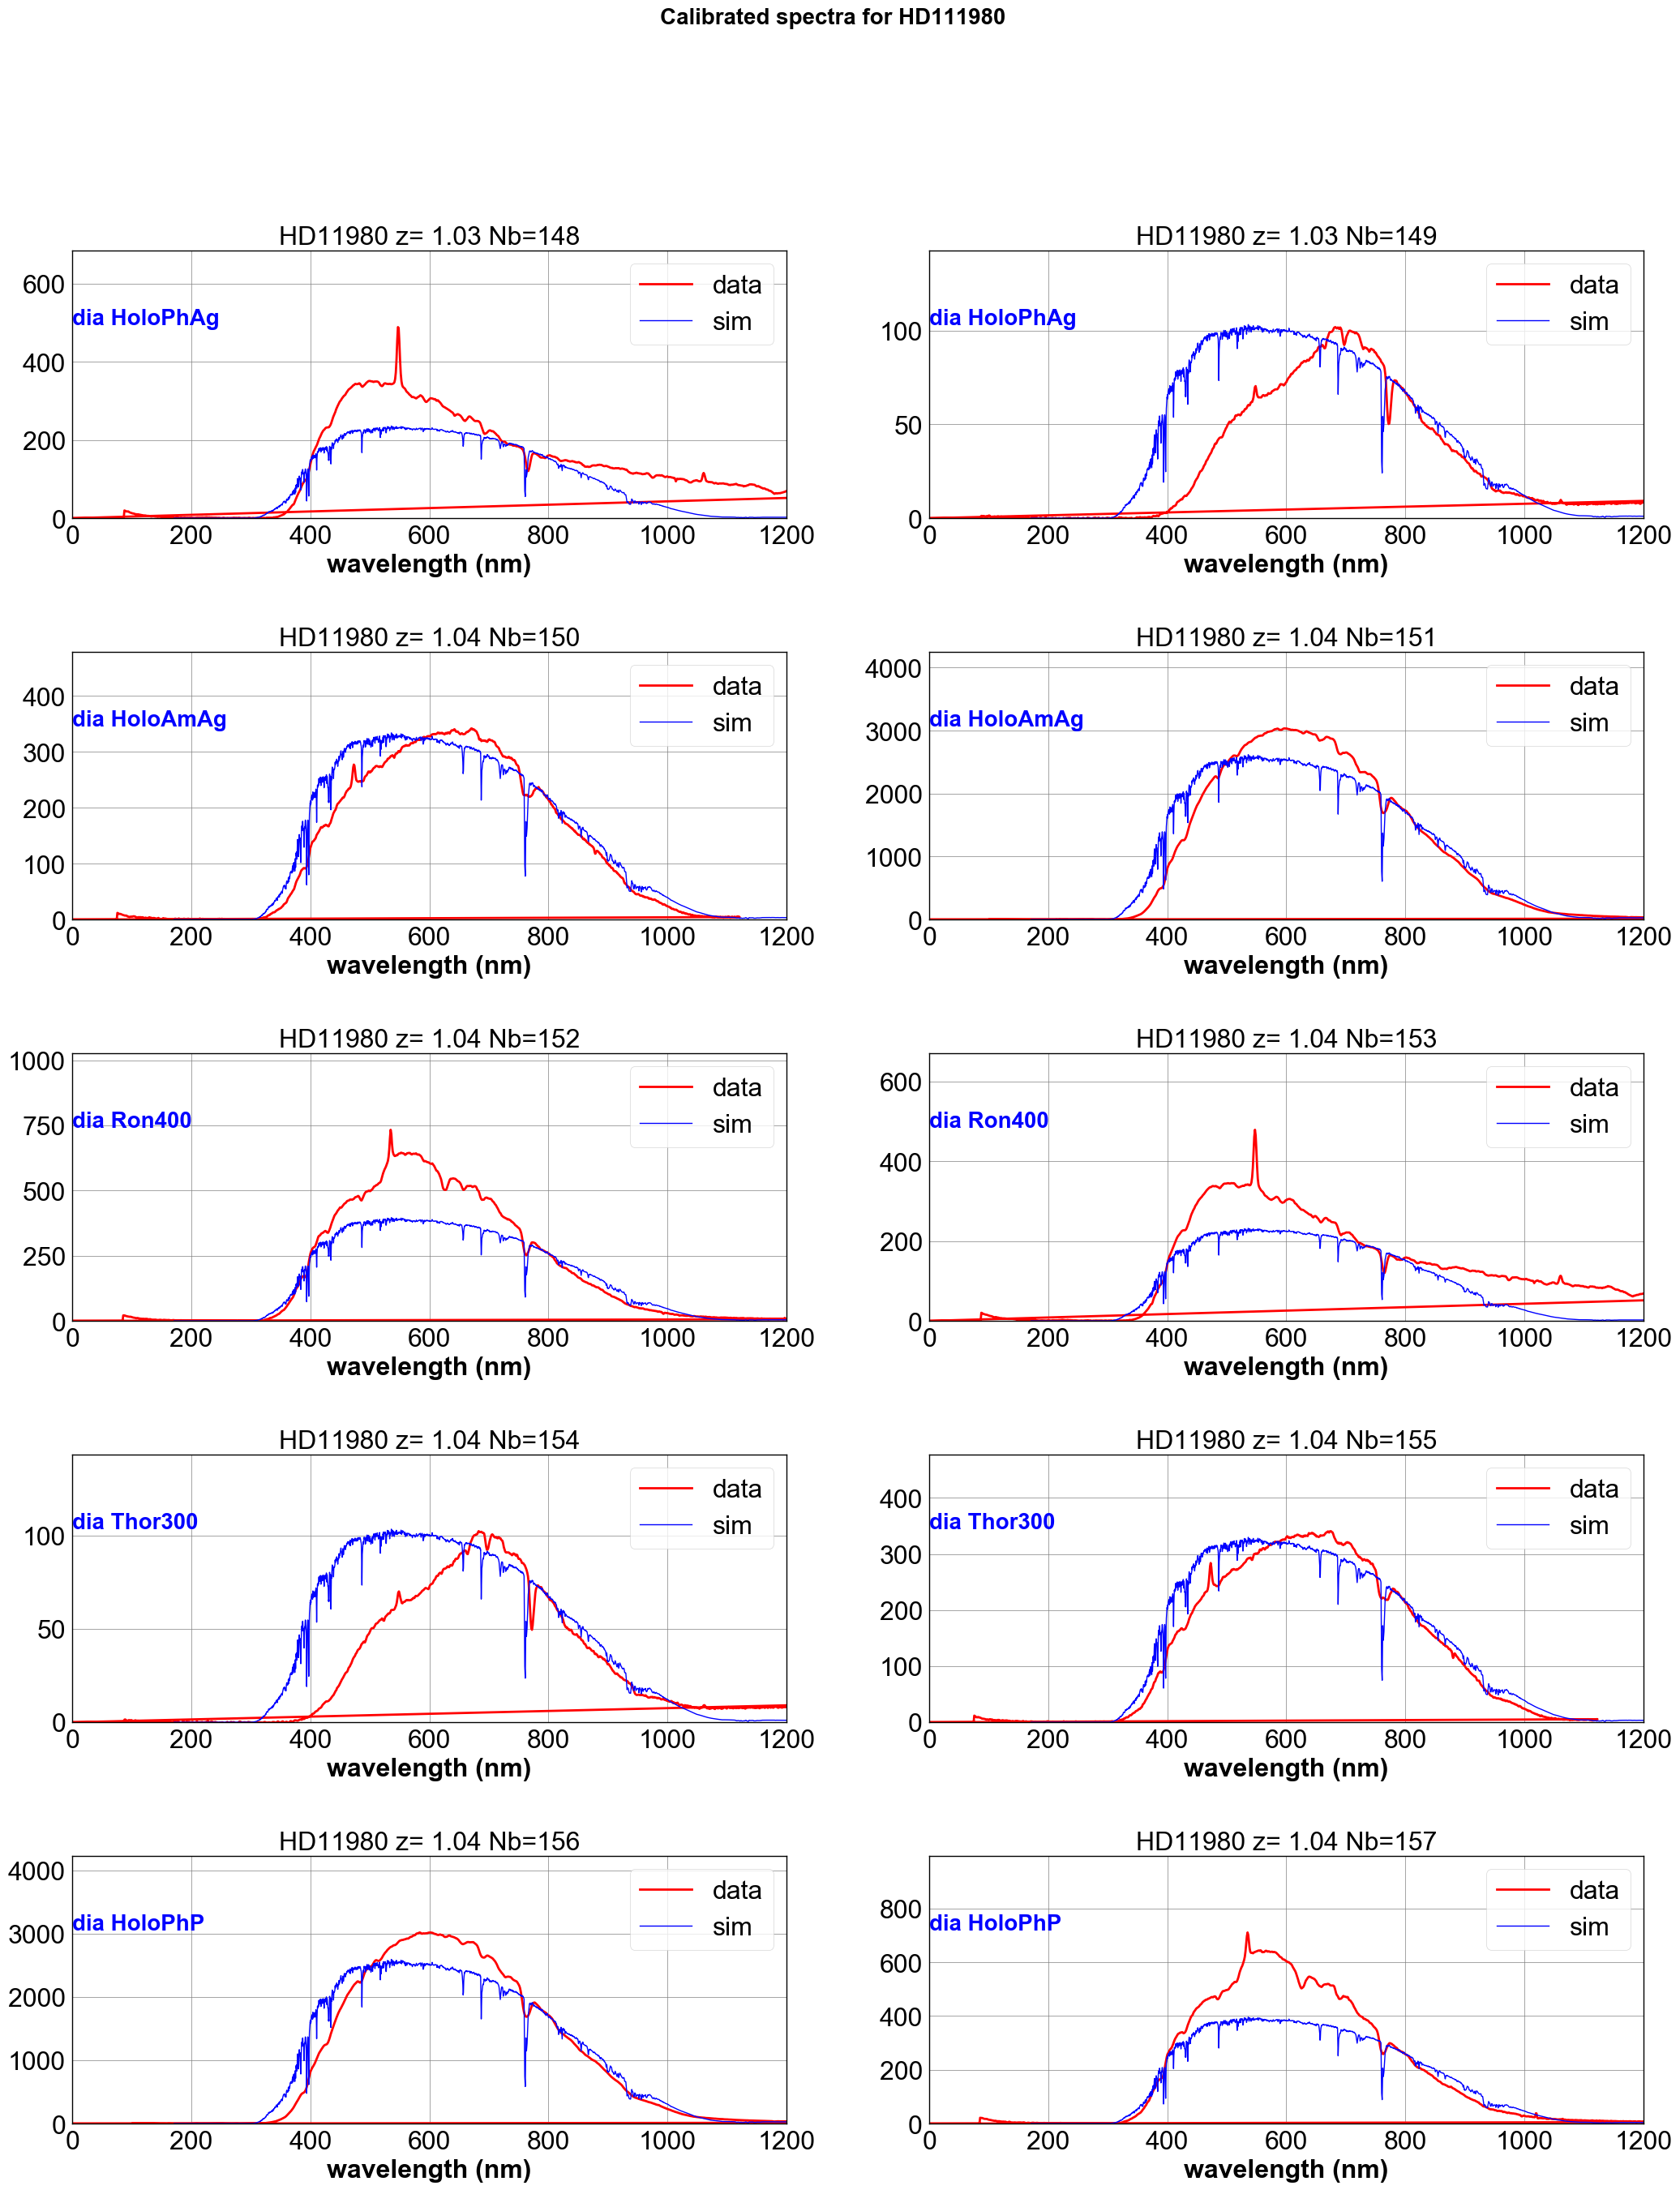

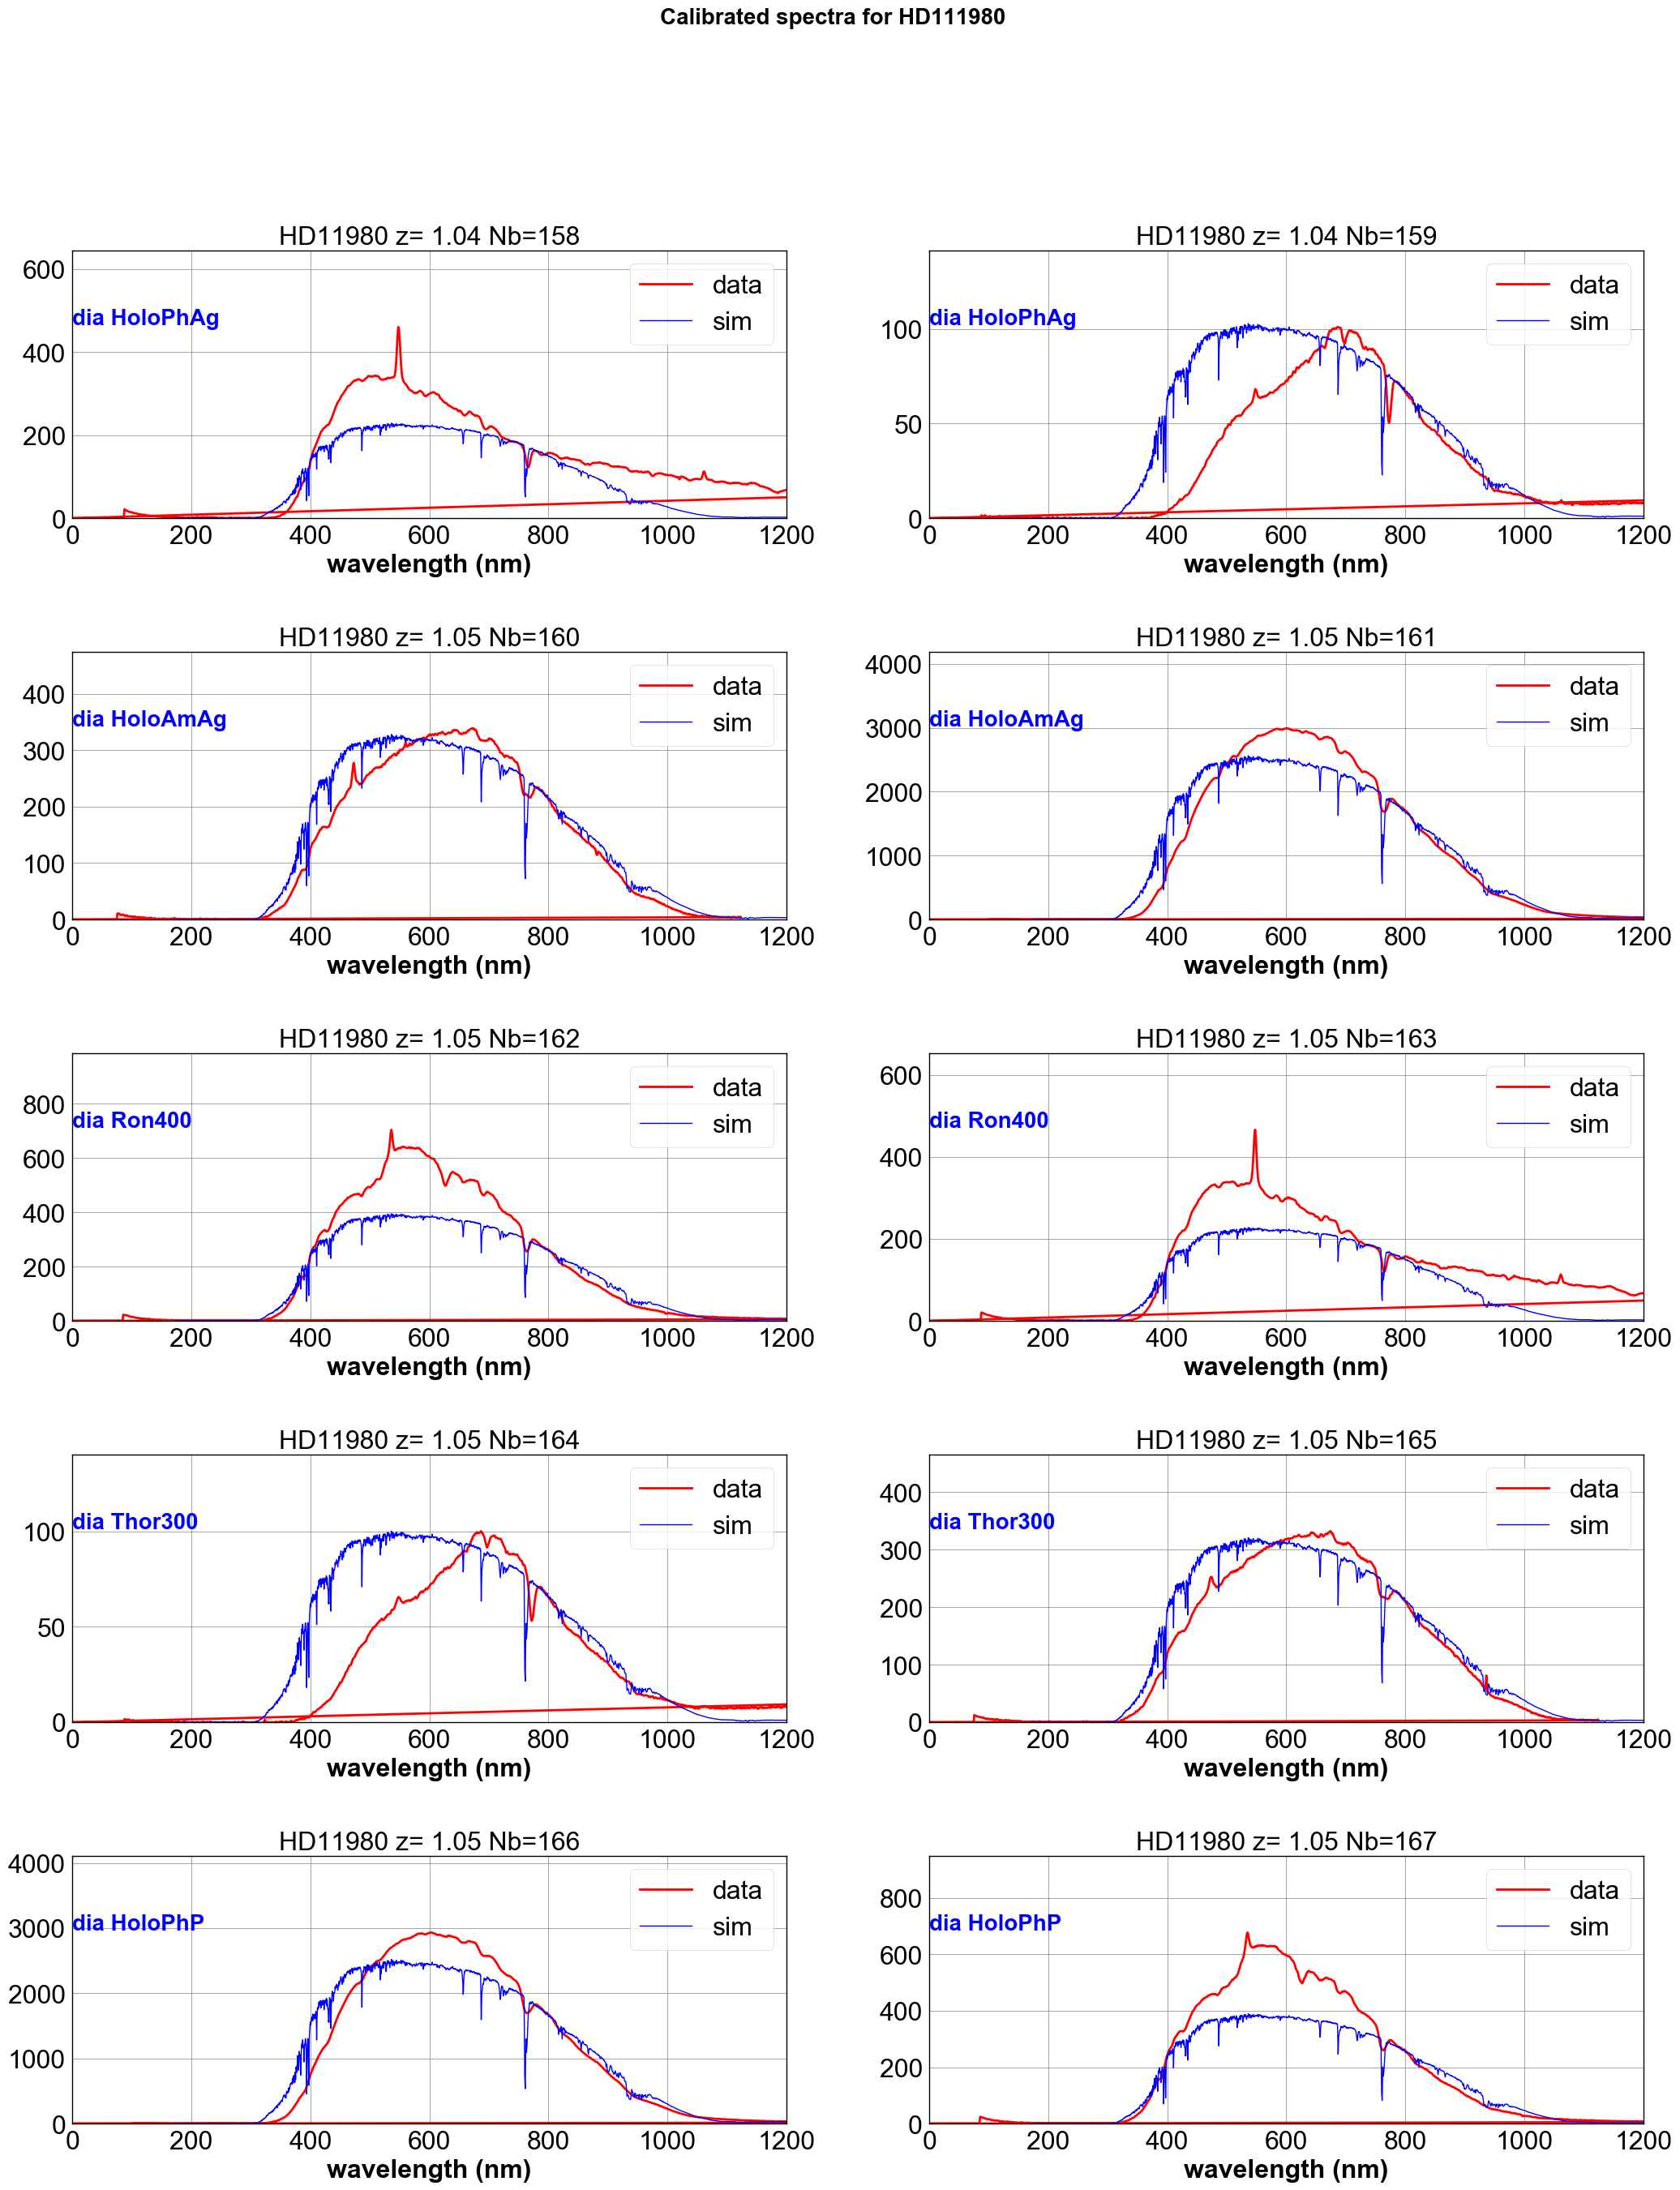

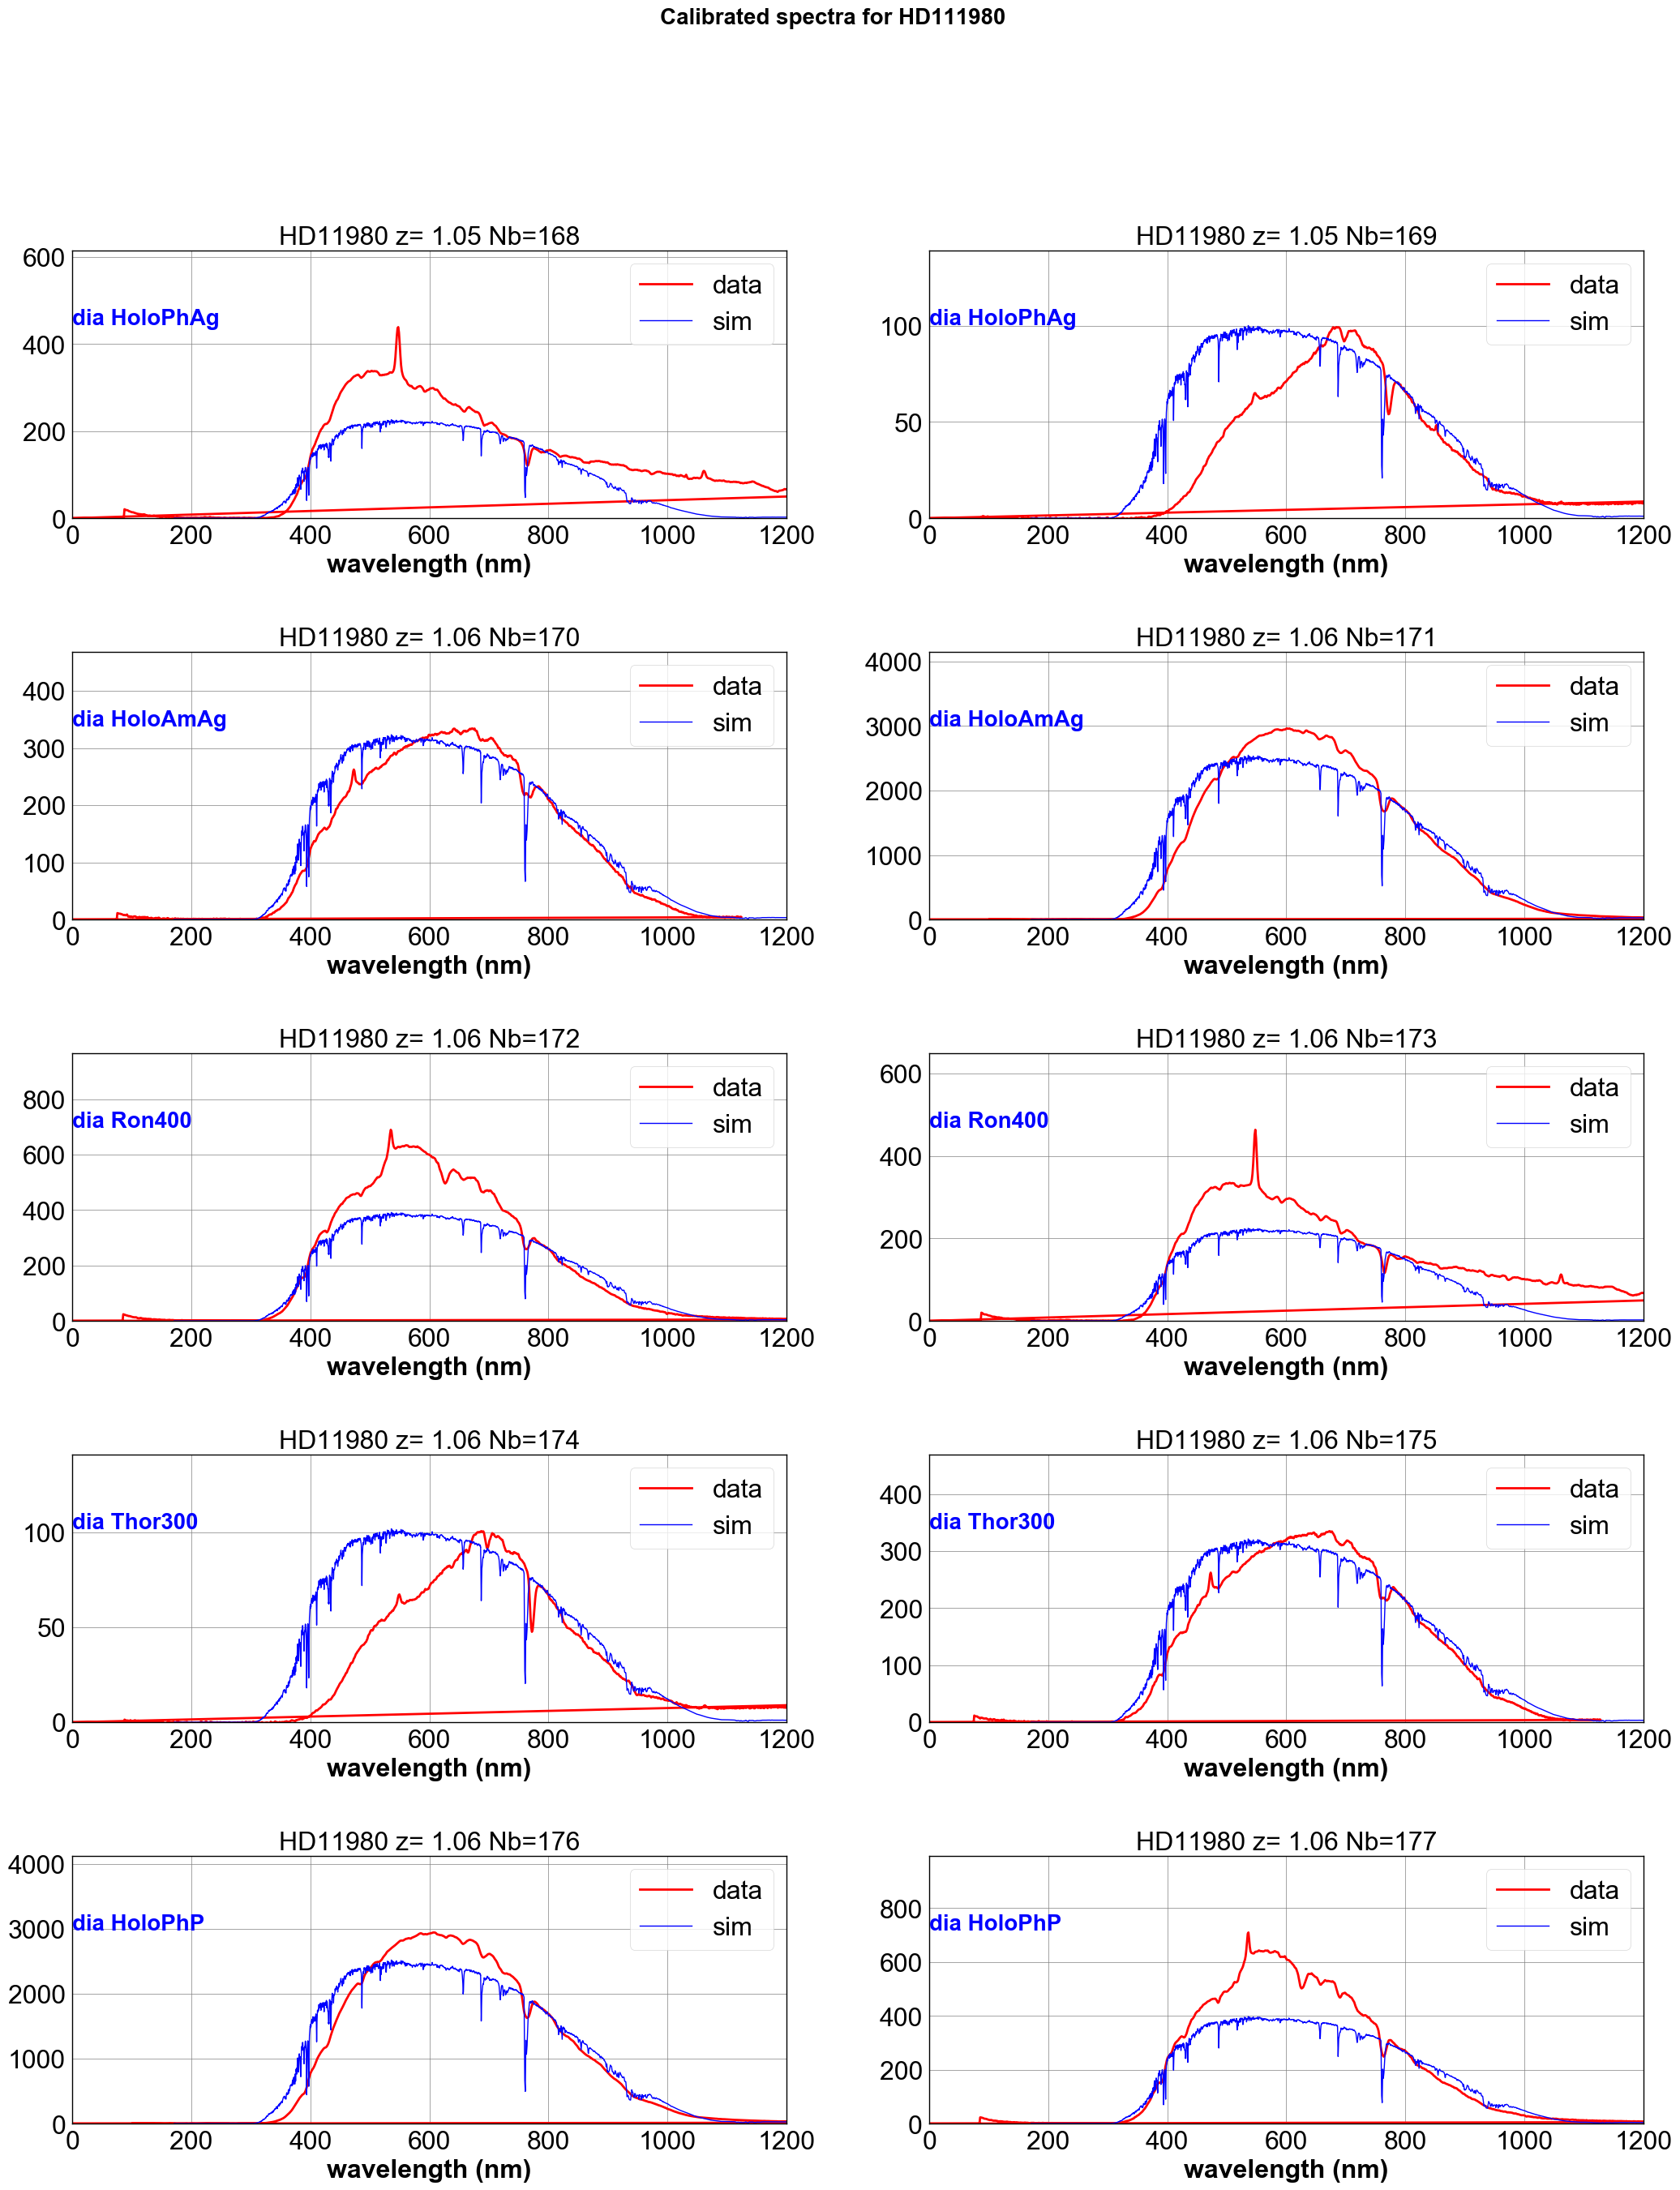

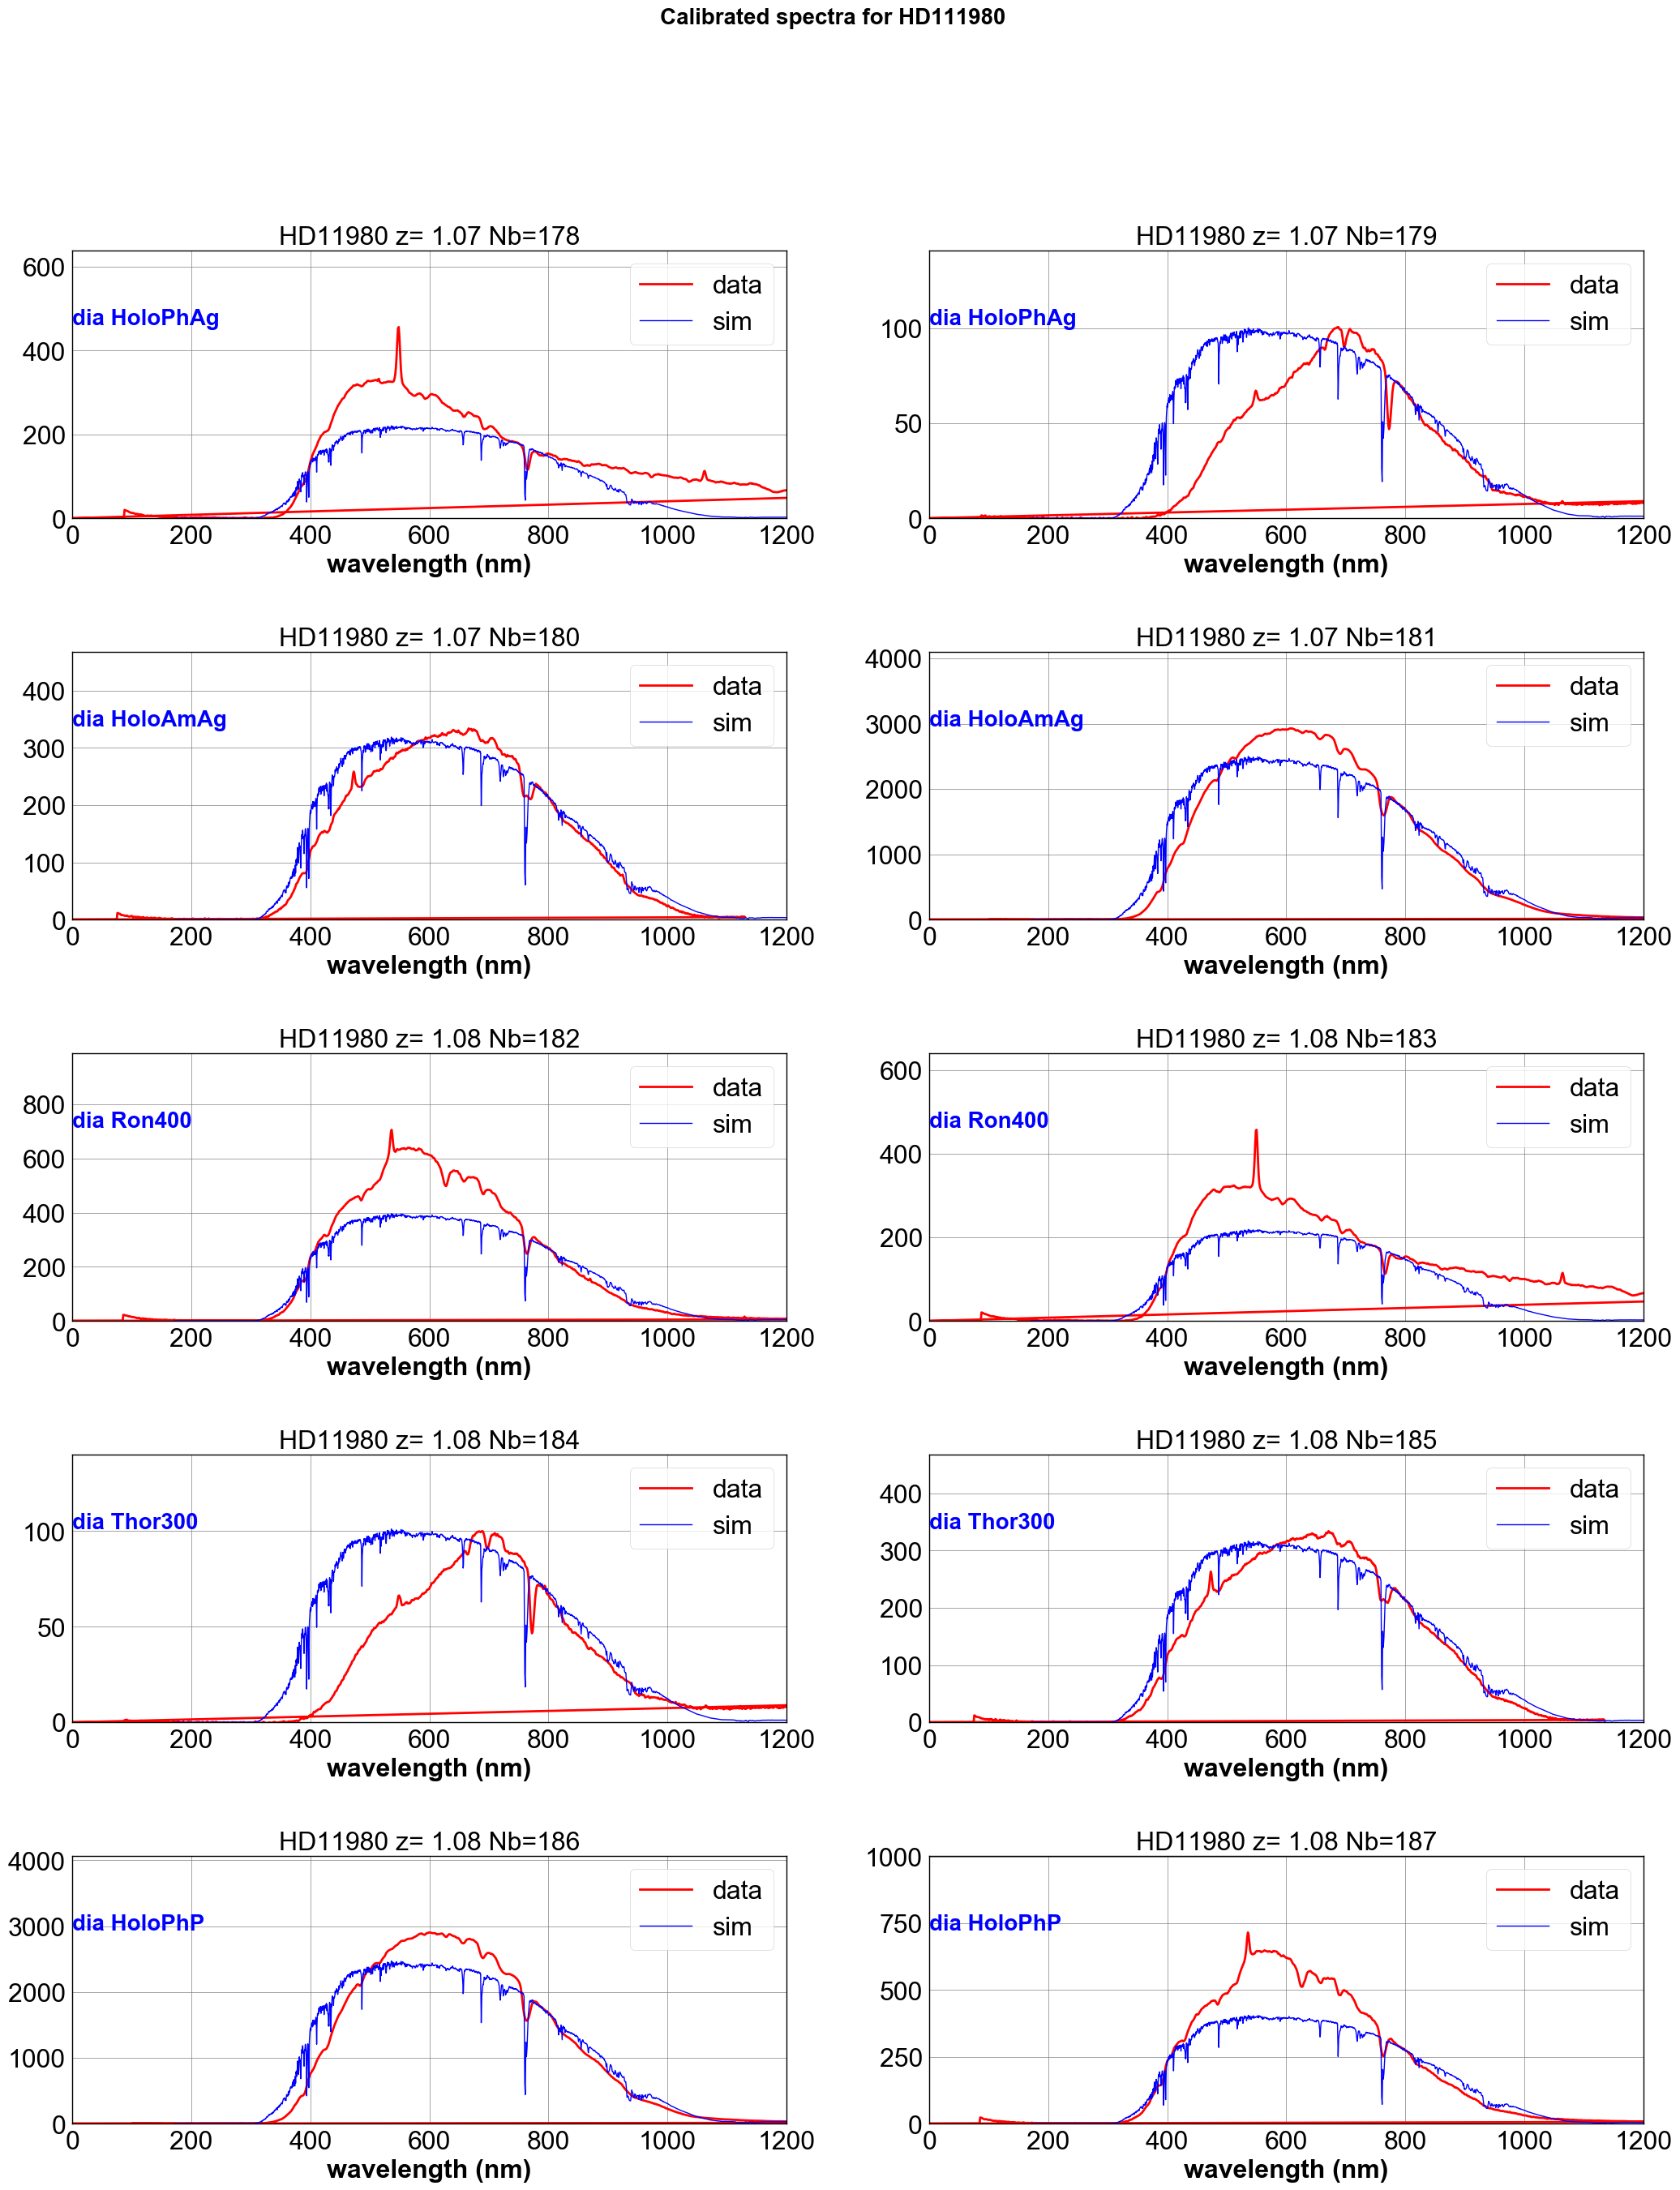

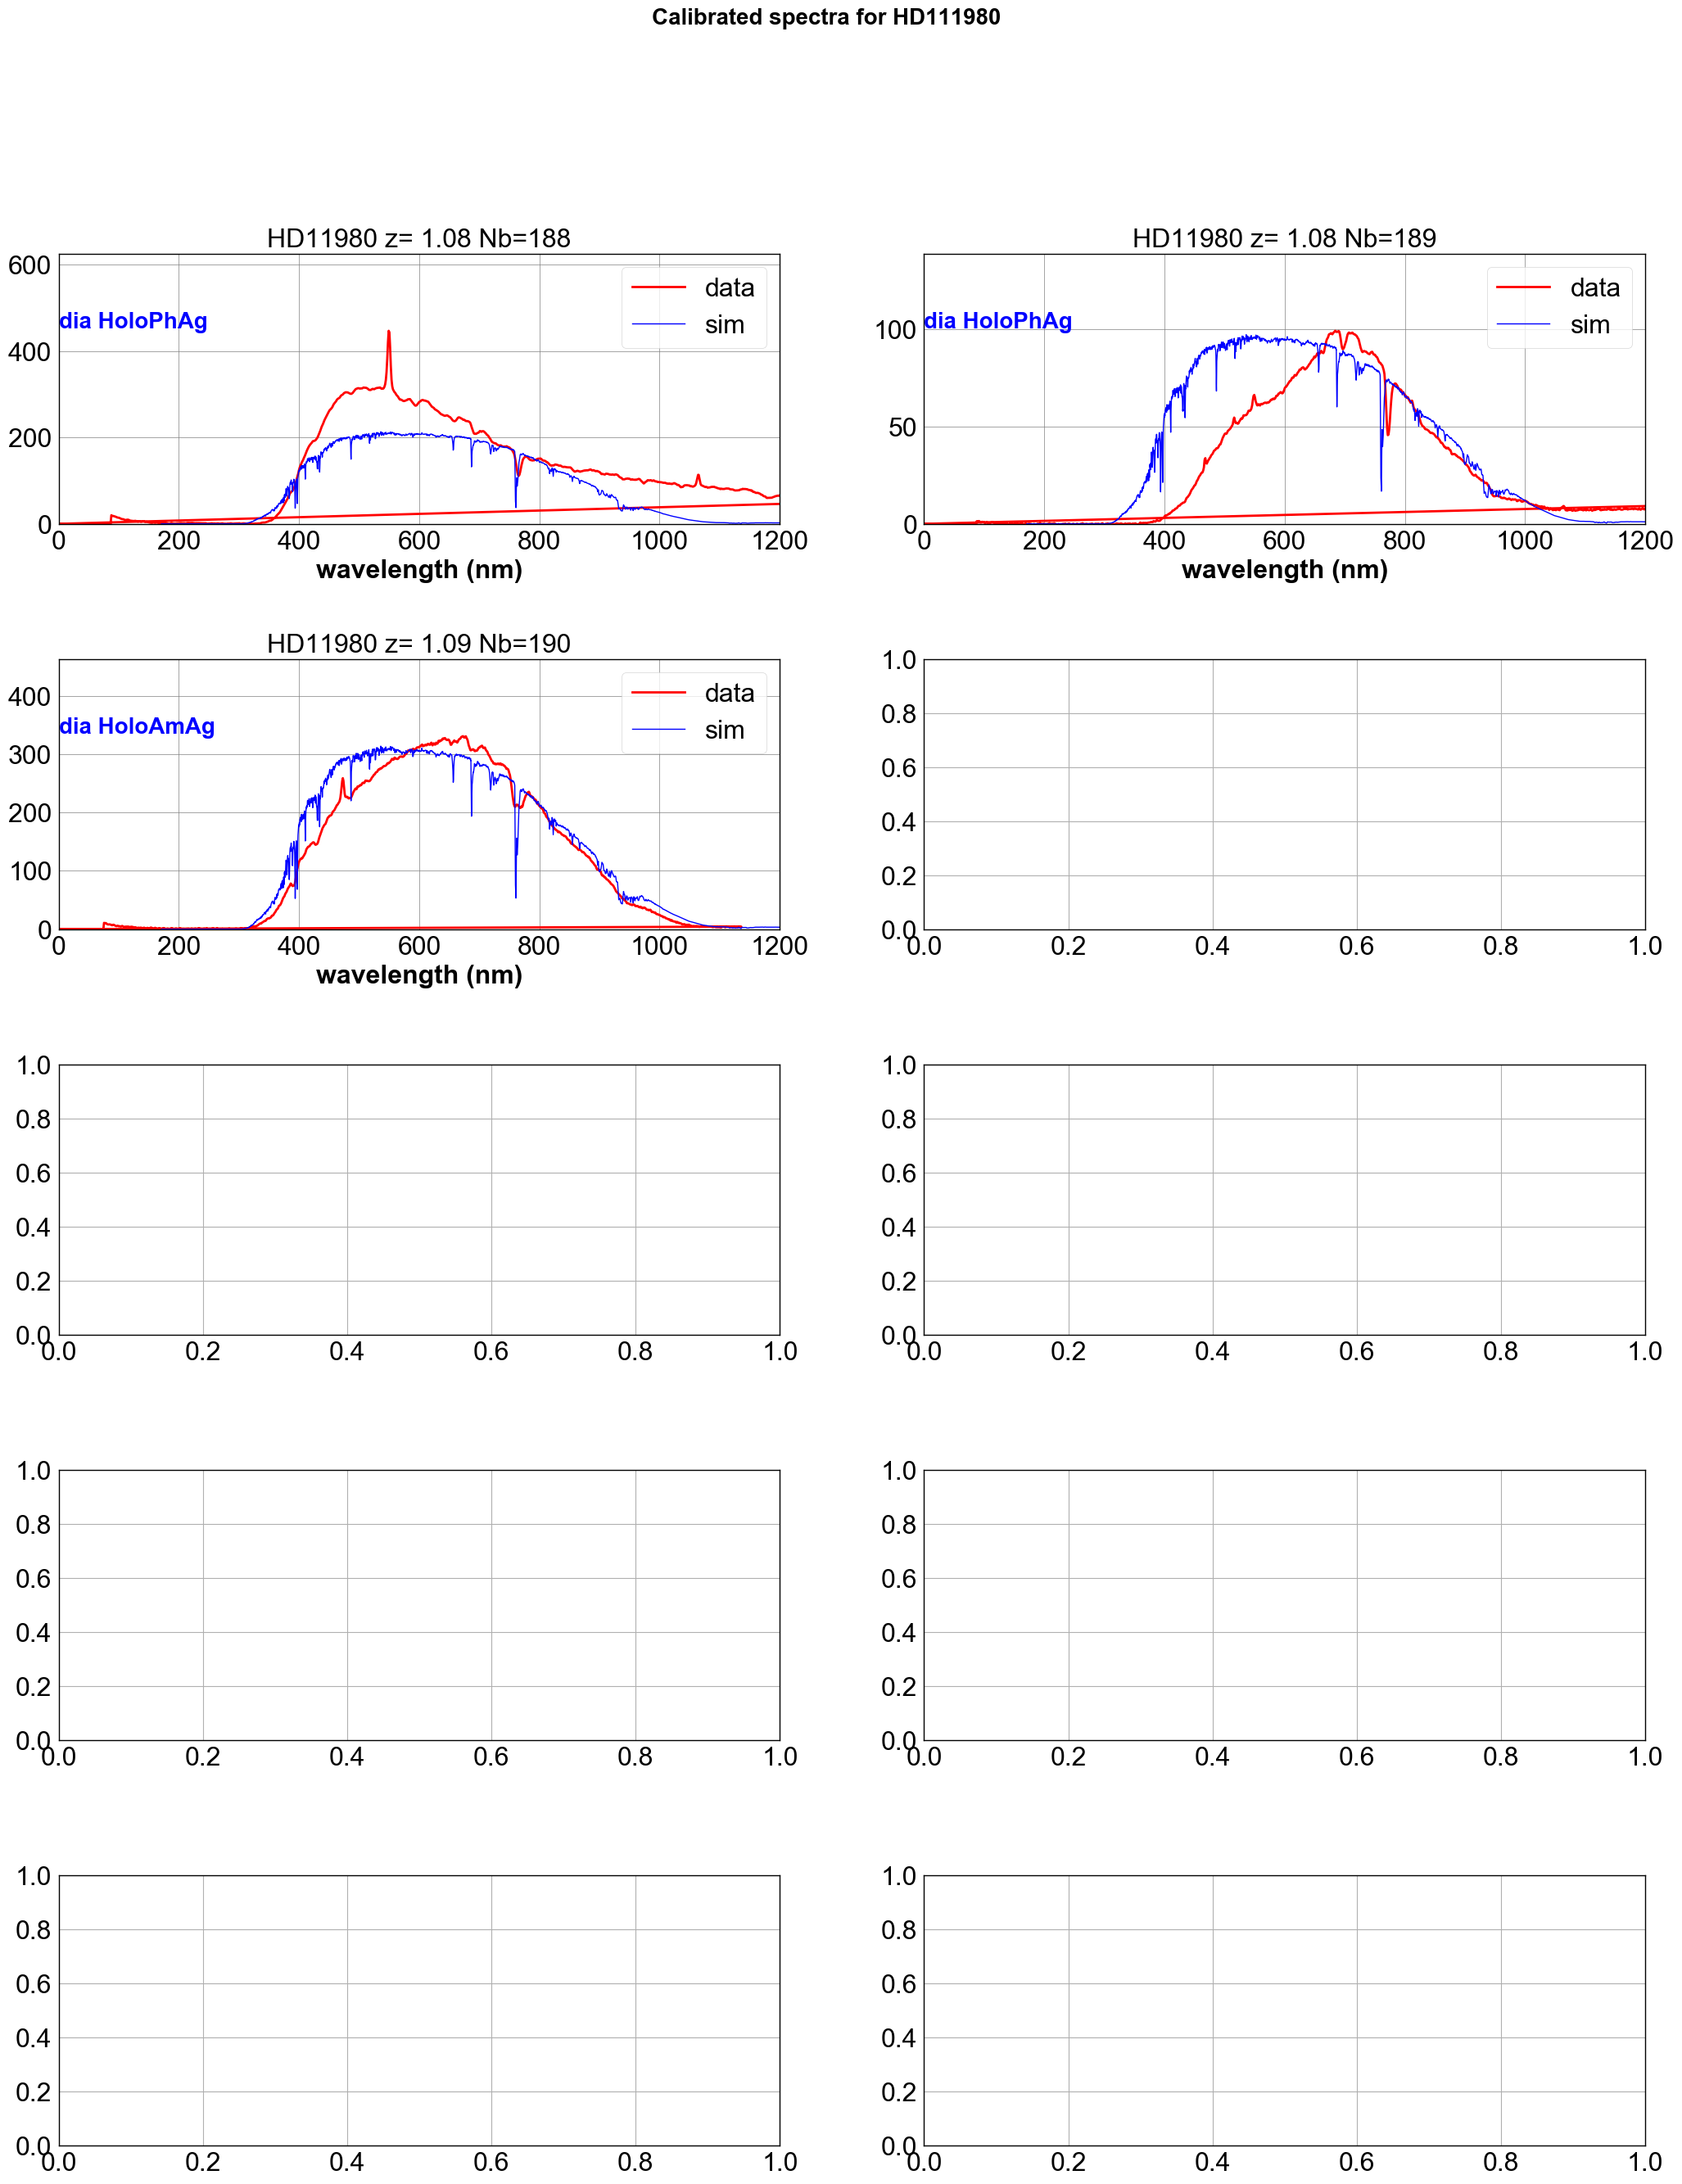

In [24]:
all_calibdatasimfactors=ShowCalibAndSimSpectrainPDF(all_rightspectra_data,all_rightspectra_wl,all_titles,object_name,all_filt,dir_top_images,all_sim_spectra_data,all_sim_spectra_wl)

## About Relative Calibration Factor

In [25]:
all_calibdatasimfactors=np.array(all_calibdatasimfactors)

In [26]:
Ron400_index

array([  4,   5,  14,  15,  24,  25,  34,  35,  44,  45,  54,  55,  64,
        65,  74,  75,  84,  85,  94,  95, 104, 105, 114, 115, 124, 125])

In [27]:
Thor300_factor=all_calibdatasimfactors[Thor300_index]
Ron400_factor=all_calibdatasimfactors[Ron400_index]
HoloPhP_factor=all_calibdatasimfactors[HoloPhP_index]
HoloPhAg_factor=all_calibdatasimfactors[HoloPhAg_index]
HoloAmAg_factor=all_calibdatasimfactors[HoloAmAg_index]


In [28]:
Thor300_factor_av=np.median(Thor300_factor)
Ron400_factor_av=np.median(Ron400_factor)
HoloPhP_factor_av=np.median(HoloPhP_factor)
HoloPhAg_factor_av=np.median(HoloPhAg_factor)
HoloAmAg_factor_av=np.median(HoloAmAg_factor)

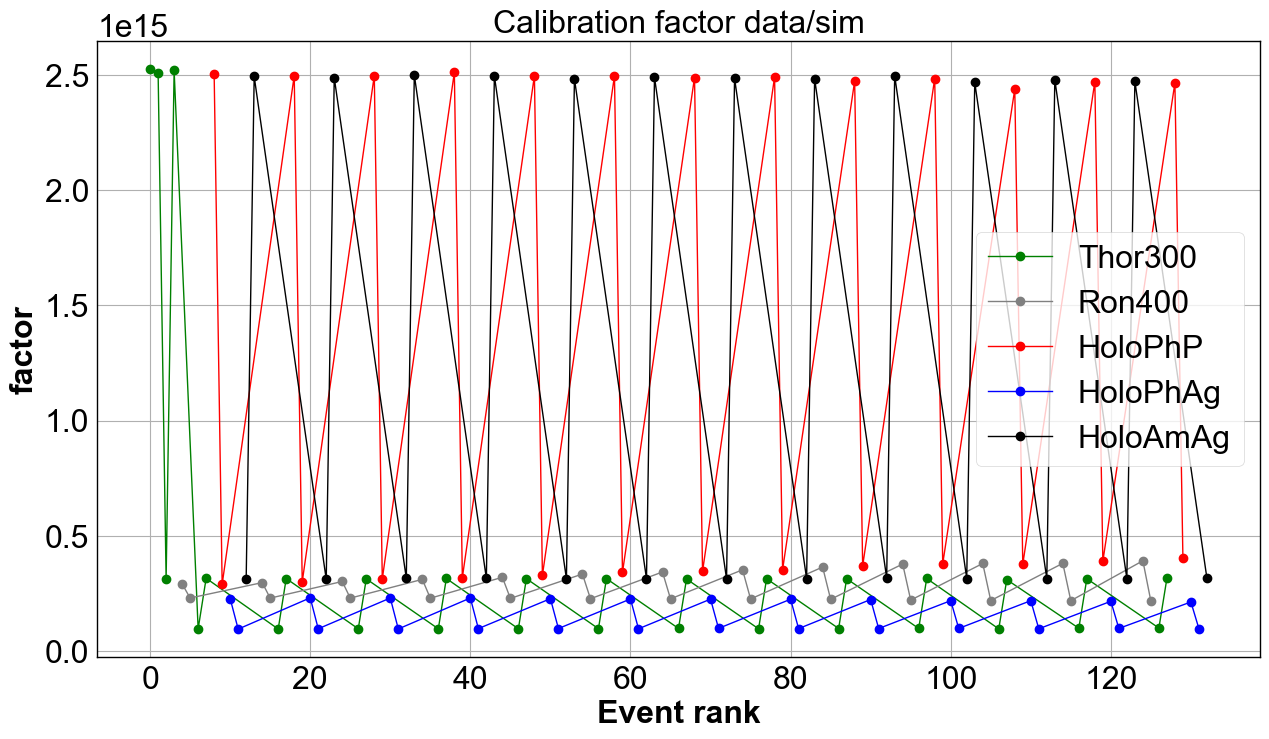

In [29]:
figfilename=os.path.join(dir_top_images,'calib_factor.pdf')

plt.figure(figsize=(15,8))

plt.plot(Thor300_index,Thor300_factor,marker='o',color='green',label='Thor300')
#plt.plot([0,Thor300_index.max()],[Thor300_factor_av,Thor300_factor_av],'g-')

plt.plot(Ron400_index,Ron400_factor,marker='o',color='grey',label='Ron400')
#plt.plot([0,Ron400_index.max()],[Ron400_factor_av,Ron400_factor_av],'-',color='grey')

plt.plot(HoloPhP_index,HoloPhP_factor,marker='o',color='red',label='HoloPhP')
#plt.plot([0,HoloPhP_index.max()],[HoloPhP_factor_av,HoloPhP_factor_av],'r-')


plt.plot(HoloPhAg_index,HoloPhAg_factor,marker='o',color='blue',label='HoloPhAg')
#plt.plot([0,HoloPhAg_index.max()],[HoloPhAg_factor_av,HoloPhAg_factor_av],'b-')

plt.plot(HoloAmAg_index,HoloAmAg_factor,marker='o',color='black',label='HoloAmAg')
#plt.plot([0,HoloAmAg_index.max()],[HoloAmAg_factor_av,HoloAmAg_factor_av],'k-')


plt.grid(True)
plt.legend(loc='best')
plt.title('Calibration factor data/sim')
plt.xlabel("Event rank")
plt.ylabel("factor")
plt.savefig(figfilename) 

In [30]:
wl_O2Aline=759.37      # Balmer Lines
wl_O2Bline=686.719
wl_Haline=656.281 
wl_Hbline=486.134
wl_Hgline=434.047 
wl_Hdline=410.175
wl_Heline=397.0

In [31]:
sel=0
thespectrum=all_rightspectra_data[sel]

In [44]:
def ShowOneSpectrum(sel):
    """
    ShowOneSpectrum
    ================
    """


    thespectrum=all_rightspectra_data[sel]
    thewl=all_rightspectra_wl[sel]
    ymin=thespectrum.min()
    ymax=thespectrum.max()*1.1
    
    wl_sim=all_sim_spectra_wl[sel]
    sim_spec=all_sim_spectra_data[sel]*all_calibdatasimfactors[sel]
    fig, ax = plt.subplots(1, 1, figsize=(15,8))


    ax.plot(thewl,thespectrum,'r-',lw=2,label='data')
    ax.plot(wl_sim,sim_spec,'b-',lw=2,label='sim')

    max_y_to_plot=thespectrum[:].max()*1.4
    ax.set_ylim(0.,max_y_to_plot)
    ax.text(0.,max_y_to_plot*1.1/1.4, all_filt[sel],verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)

    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)
    
        
    YMIN=0.
    YMAX=max_y_to_plot
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    

    #ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
    #ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
    #ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{\\alpha}$',lw=1)
    #ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{\\beta}$',lw=1)
    #ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{\\gamma}$',lw=1)
    #ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{\\delta}$',lw=1)
    #ax.plot([wl_Heline,wl_Heline],[ymin,ymax],'y-',label='$H_{\\epsilon}$',lw=1)

    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    
    figname='one_intput_calibrated_spectra_{}.pdf'.format(sel)
    
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

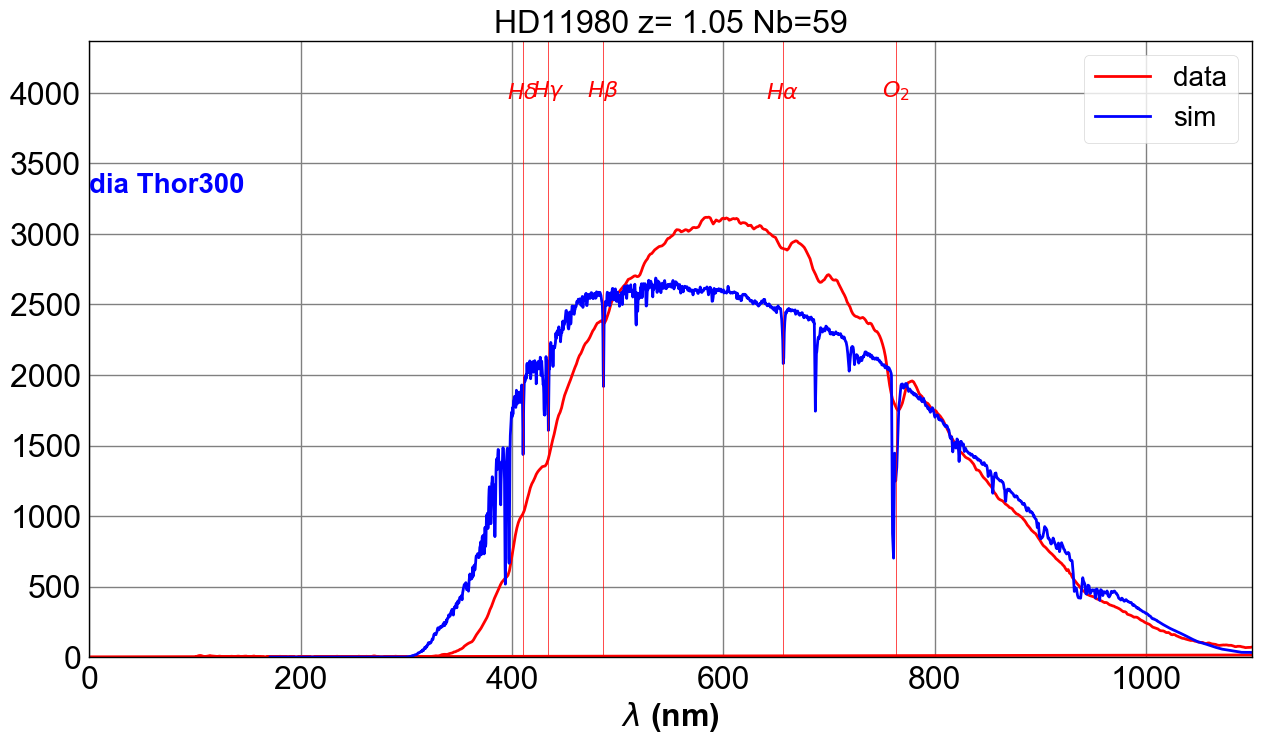

In [45]:
ShowOneSpectrum(1)

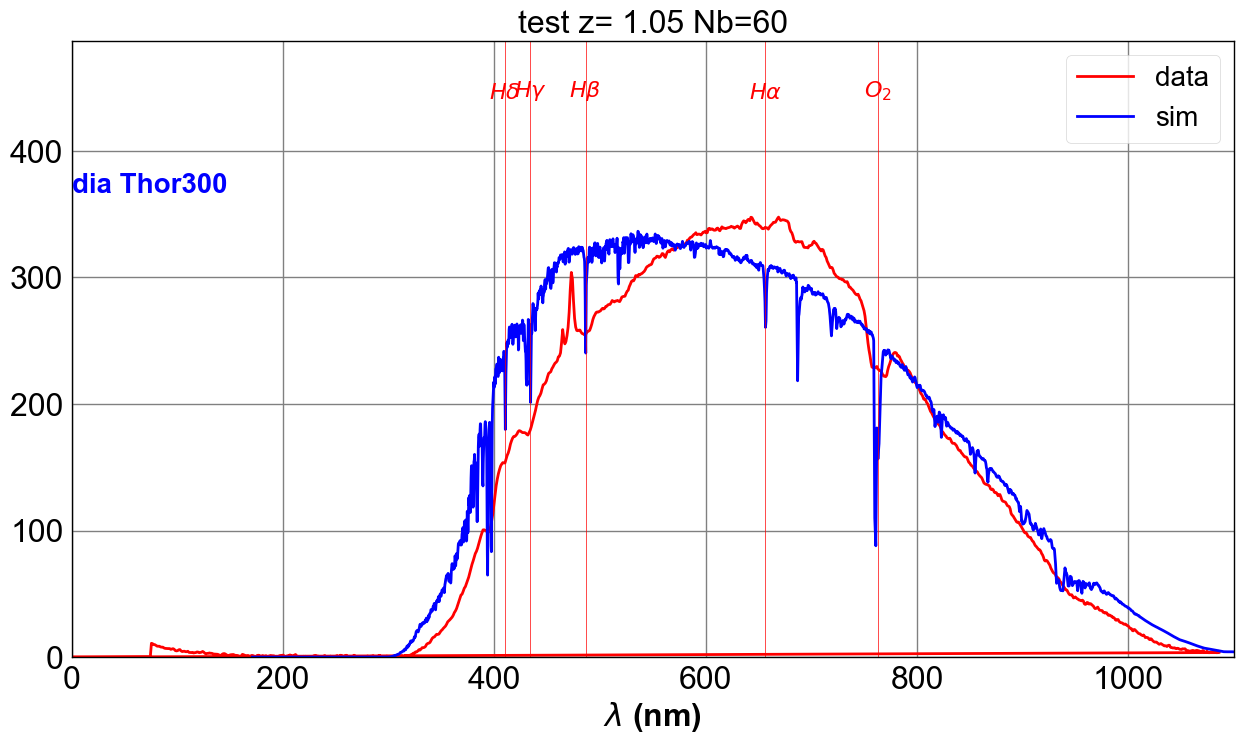

In [46]:
ShowOneSpectrum(2)

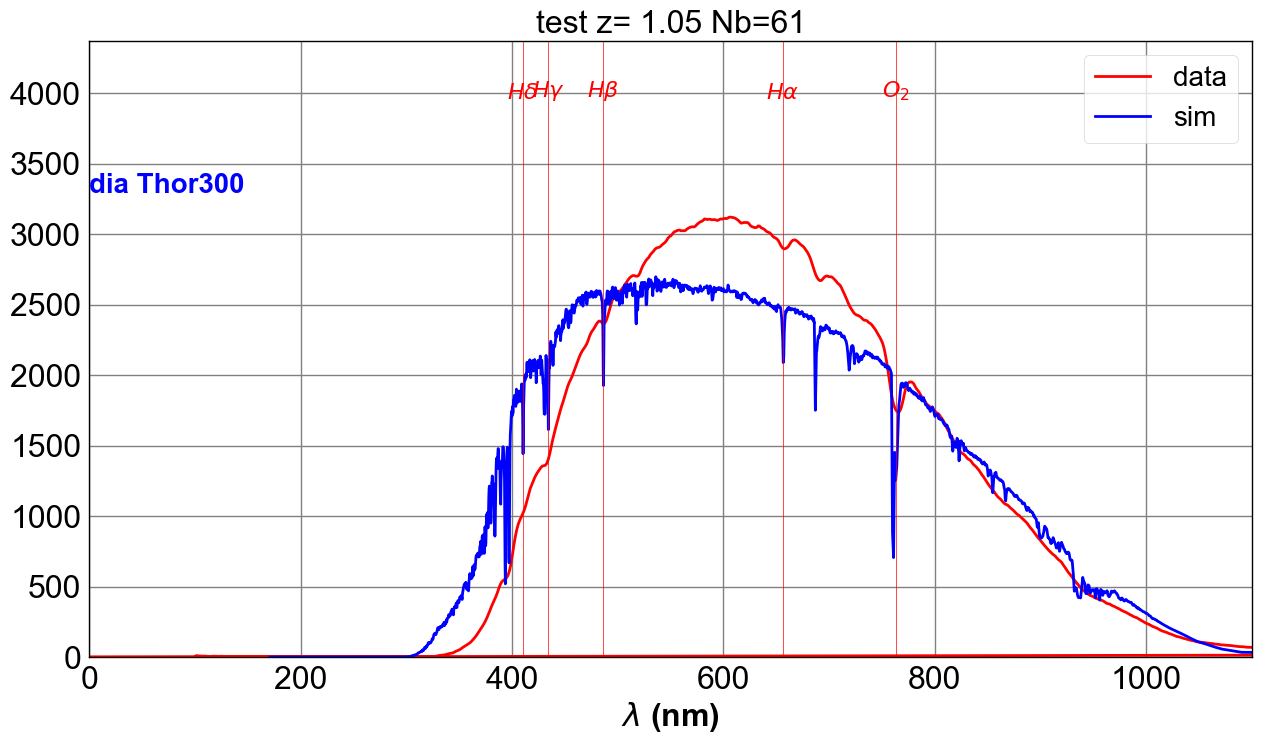

In [47]:
ShowOneSpectrum(3)

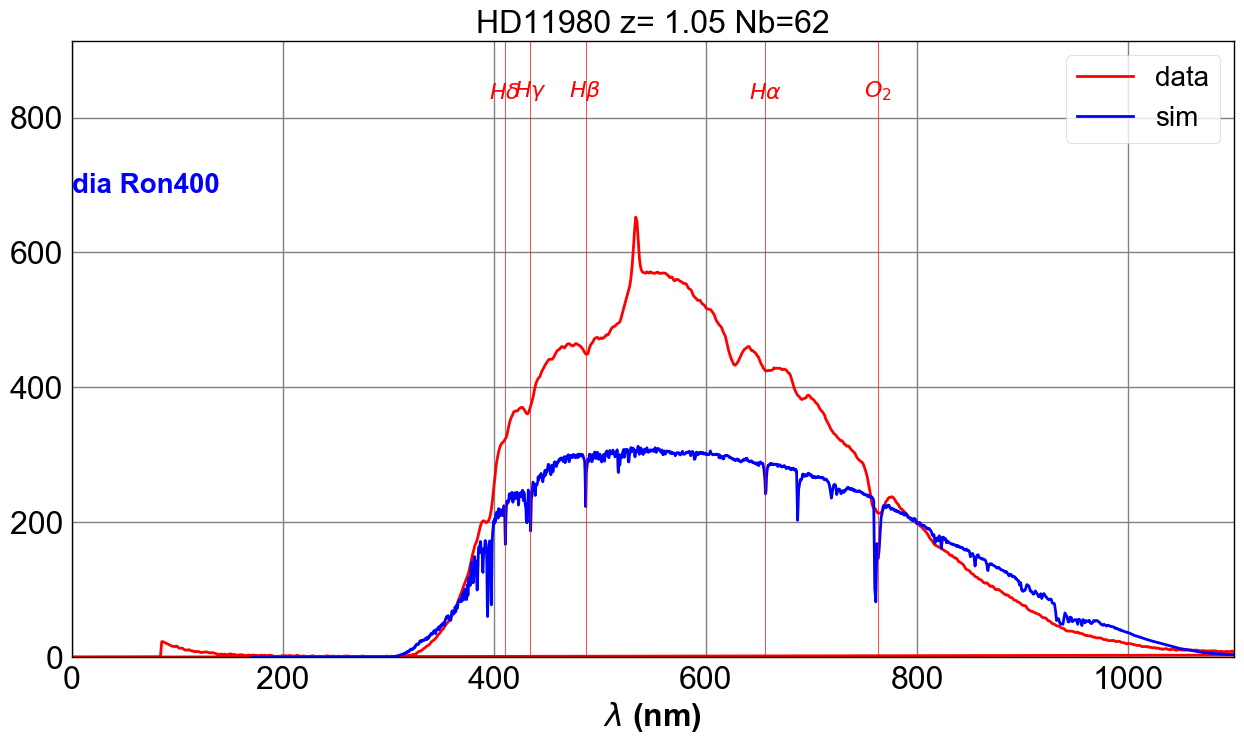

In [48]:
ShowOneSpectrum(4)

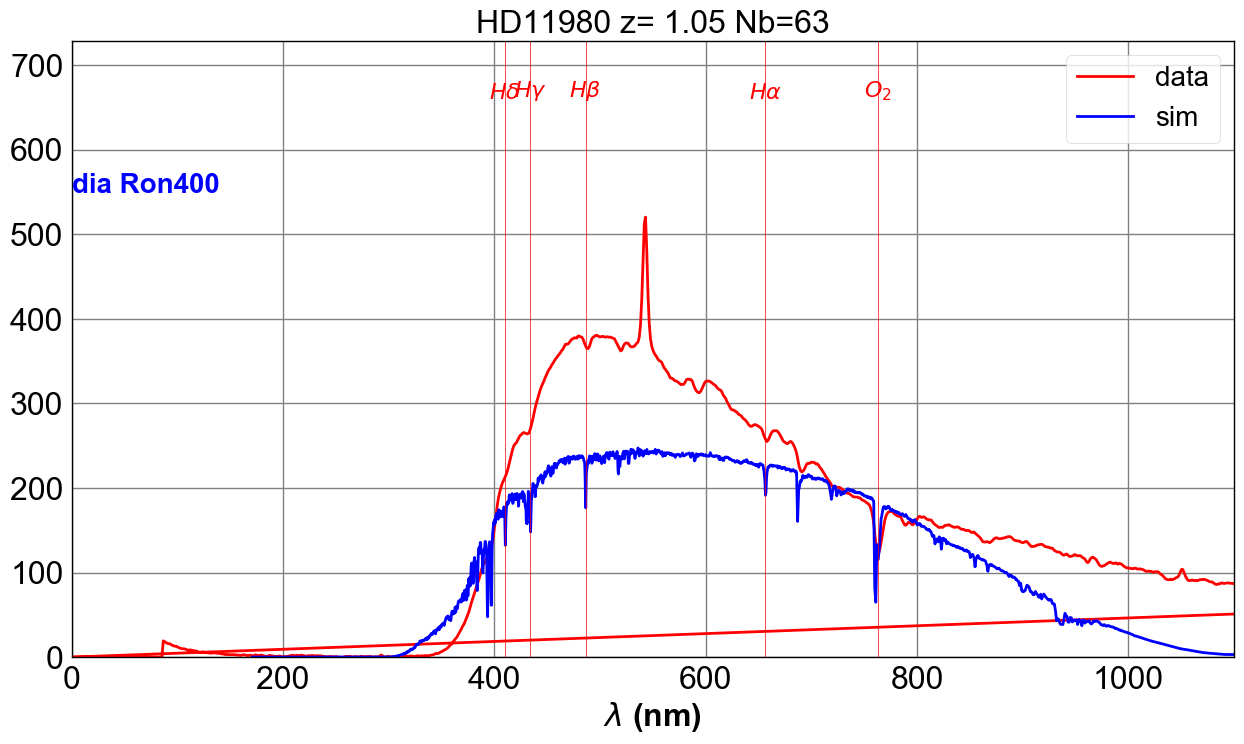

In [49]:
ShowOneSpectrum(5)

In [54]:
def ShowOneSpectrumNextFilt(sel):
    """
    ShowOneSpectrum
    ================
    """

    NBSPECTOPLOT=5
    
    the_spectra= []
    the_wl=[]
    the_max = []
    the_label= []
    
    for i in np.arange(NBSPECTOPLOT):

        the_spectrum=all_rightspectra_data[sel+i]
        thewl=all_rightspectra_wl[sel+i]
        theymin=the_spectrum.min()
        theymax=the_spectrum.max()
        thelabel=all_filt[sel+i]
        
        the_spectra.append(the_spectrum)
        the_wl.append(thewl)
        the_max.append(theymax)
        the_label.append(thelabel)

        
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    for i in np.arange(NBSPECTOPLOT):        
        ax.plot(the_wl[i],the_spectra[i],lw=3,label=the_label[i])

 
        
    max_y_to_plot=(np.array(the_max)).max()
    ymin=0
    ymax=max_y_to_plot
    ax.set_ylim(0.,max_y_to_plot*1.2)
    
    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

    YMIN=0.
    YMAX=max_y_to_plot*1.1
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    
    
    #ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b:',label='$O_2(A)$',lw=3)
    #ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b:',label='$O_2(B)$',lw=3)
    #ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r:',label='$H_{\\alpha}$',lw=3)
    #ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g:',label='$H_{\\beta}$',lw=3)
    #ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c:',label='$H_{\\gamma}$',lw=3)
    #ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k:',label='$H_{\\delta}$',lw=3)
    #ax.plot([wl_Heline,wl_Heline],[ymin,ymax],'y:',label='$H_{\\epsilon}$',lw=3)

    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    
    
    figname='five_intput_calibrated_spectra_{}.pdf'.format(sel)
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

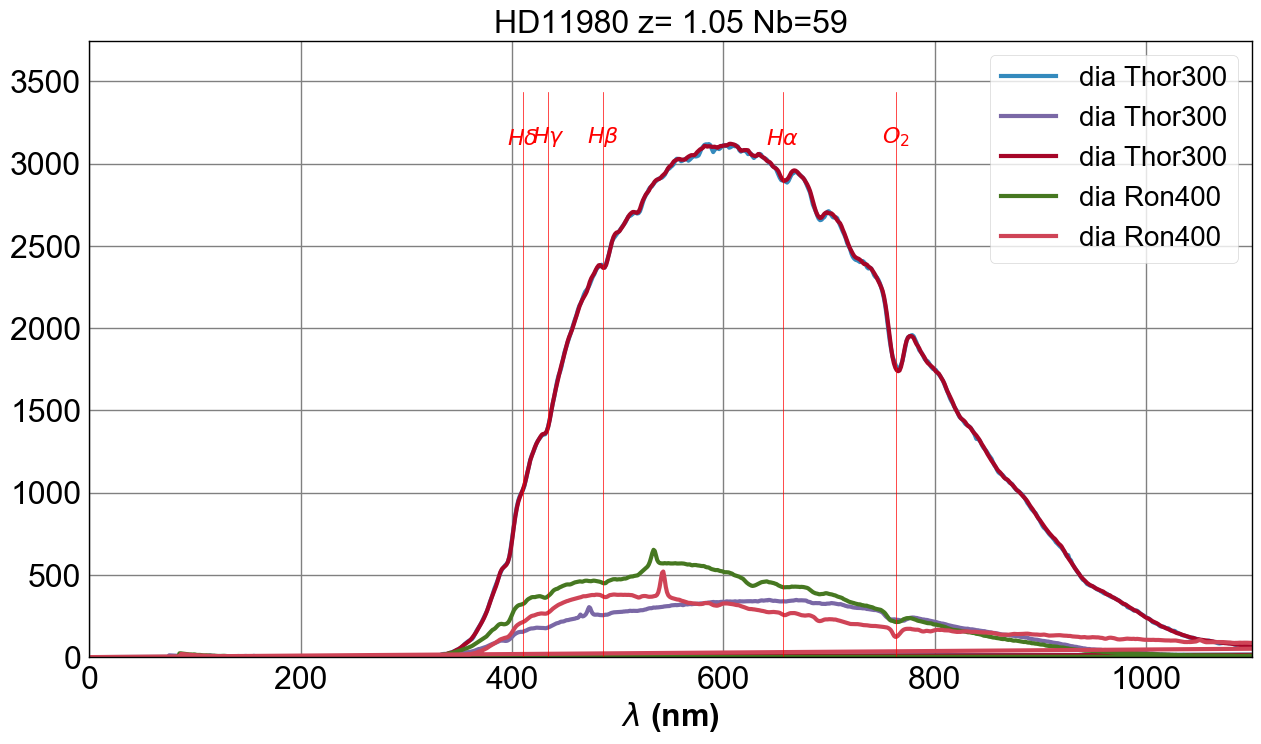

In [55]:
ShowOneSpectrumNextFilt(1)